Considere uma cadeia circular (primeira massa liga a última) composta por N átomos conectados por molas idênticas de constante elástica. O sistema pode ser de dois tipos:
• Cadeia Aleatória: Cada átomo possui uma massa mi escolhida aleatoriamente entre m e 5m , com  assumindo apenas valores inteiros (mi=m, 2m, 3m, 4m e 5m).
• Cadeia Homogênea: Todas as massas são iguais a m

Parâmetros
- Massa base:  m = 1kg
- Constante elástica: k=1 N/m
- Tamanhos da cadeia: 100, 1000 e 10.000

1. Cálculo das Frequências de Vibração
- Para cada valor de N, calcule as frequências naturais de vibração para:
- Cadeia com massas aleatórias (cada mi sorteado entre m e 5m )
- Cadeia homogênea (todas as massas )
- Considere sempre as pontas livres (não vale)

2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores de frequência em cada caso.
• Compare os histogramas entre a cadeia aleatória e a homogênea, para cada tamanho de N 

<>:80: SyntaxWarning: invalid escape sequence '\o'
<>:80: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\1459511554.py:80: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)


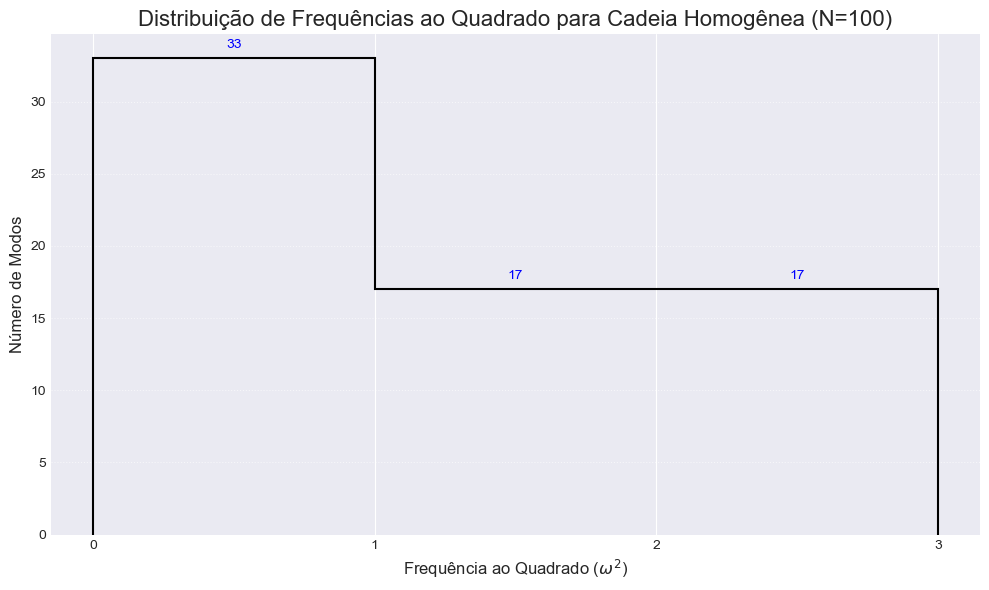

Contagem de modos para Cadeia Homogênea:
  [0-1): 33
  [1-2): 17
  [2-3): 17

Número de modos com frequências ao quadrado >= 3: 33
Algumas dessas frequências: [3.07165359 3.07165359 3.1755705  3.1755705  3.27484798]...


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                          Pode ser um único float (homogênea)
                                          ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- Parâmetros Definidos pelo Usuário ---
N_particles = 100 # Um número maior de partículas para uma melhor distribuição no histograma
k_spring = 1     # Constante elástica da mola

# --- Escolha o tipo de cadeia para analisar no histograma ---
# Opção 1: Cadeia Homogênea (descomente para usar)
chain_type = "Homogênea"
mass_value_for_chain = 1 # Todas as massas são 'm'


# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# Calcula autovalores
autovalores, _ = eig(B_matrix)

# Os autovalores podem ser complexos devido a pequenas imprecisões numéricas.
# Para frequências, esperamos valores reais e não-negativos.
frequencias_quadrado = np.real(autovalores)
frequencias_quadrado = frequencias_quadrado[frequencias_quadrado >= 0] # Garante que sejam não-negativos

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))

# Definindo os "bins" (intervalos) para o histograma
bins = [0, 1, 2, 3] # Intervalos 0-1, 1-2, 2-3

# Plotando o histograma com as modificações:
# rwidth=1.0 para barras coladas (sem espaço entre elas)
# histtype='step' para apenas o contorno, sem preenchimento
n, bins, patches = plt.hist(frequencias_quadrado, bins=bins,
                            edgecolor='black', # Cor do contorno
                            histtype='step',   # Tipo de histograma: apenas contorno
                            rwidth=1.0,        # Barras coladas
                            linewidth=1.5)     # Espessura da linha do contorno

plt.title(f'Distribuição de Frequências ao Quadrado para Cadeia {chain_type} (N={N_particles})', fontsize=16)
plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)
plt.ylabel('Número de Modos', fontsize=12)
plt.xticks(bins) # Garante que os ticks do eixo X estejam nos limites dos bins
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Adiciona o número de modos em cada barra do histograma
# O posicionamento 'x' precisará de um pequeno ajuste para ficar no centro do bin
for i in range(len(n)):
    x_pos = bins[i] + 0.5 * (bins[i+1] - bins[i]) # Centro do bin
    plt.text(x_pos, n[i] + 0.5,
             f'{int(n[i])}', ha='center', va='bottom', fontsize=10, color='blue')


plt.tight_layout()
plt.show()

# Opcional: Imprimir a contagem exata para cada bin
print(f"Contagem de modos para Cadeia {chain_type}:")
print(f"  [0-1): {np.sum((frequencias_quadrado >= 0) & (frequencias_quadrado < 1))}")
print(f"  [1-2): {np.sum((frequencias_quadrado >= 1) & (frequencias_quadrado < 2))}")
print(f"  [2-3): {np.sum((frequencias_quadrado >= 2) & (frequencias_quadrado < 3))}")

frequencias_fora_intervalo = frequencias_quadrado[frequencias_quadrado >= 3]
if len(frequencias_fora_intervalo) > 0:
    print(f"\nNúmero de modos com frequências ao quadrado >= 3: {len(frequencias_fora_intervalo)}")
    print(f"Algumas dessas frequências: {np.sort(frequencias_fora_intervalo)[:5]}...")

<>:80: SyntaxWarning: invalid escape sequence '\o'
<>:80: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\2044466340.py:80: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)


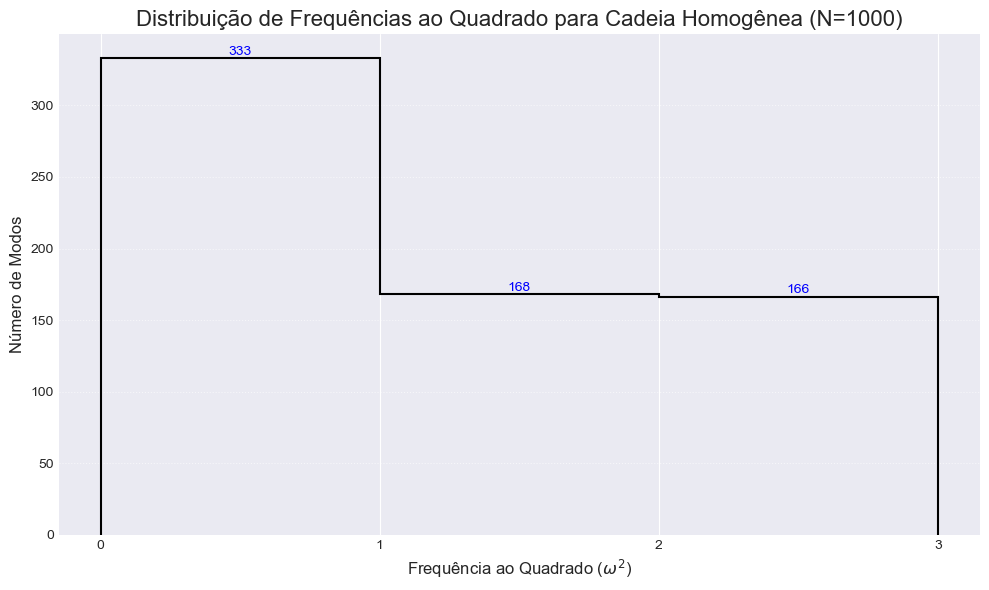

Contagem de modos para Cadeia Homogênea:
  [0-1): 333
  [1-2): 168
  [2-3): 166

Número de modos com frequências ao quadrado >= 3: 333
Algumas dessas frequências: [3.0072464  3.0072464  3.01808283 3.01808283 3.02887907]...


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                          Pode ser um único float (homogênea)
                                          ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- Parâmetros Definidos pelo Usuário ---
N_particles = 1000 # Um número maior de partículas para uma melhor distribuição no histograma
k_spring = 1     # Constante elástica da mola

# --- Escolha o tipo de cadeia para analisar no histograma ---
# Opção 1: Cadeia Homogênea (descomente para usar)
chain_type = "Homogênea"
mass_value_for_chain = 1 # Todas as massas são 'm'


# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# Calcula autovalores
autovalores, _ = eig(B_matrix)

# Os autovalores podem ser complexos devido a pequenas imprecisões numéricas.
# Para frequências, esperamos valores reais e não-negativos.
frequencias_quadrado = np.real(autovalores)
frequencias_quadrado = frequencias_quadrado[frequencias_quadrado >= 0] # Garante que sejam não-negativos

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))

# Definindo os "bins" (intervalos) para o histograma
bins = [0, 1, 2, 3] # Intervalos 0-1, 1-2, 2-3

# Plotando o histograma com as modificações:
# rwidth=1.0 para barras coladas (sem espaço entre elas)
# histtype='step' para apenas o contorno, sem preenchimento
n, bins, patches = plt.hist(frequencias_quadrado, bins=bins,
                            edgecolor='black', # Cor do contorno
                            histtype='step',   # Tipo de histograma: apenas contorno
                            rwidth=1.0,        # Barras coladas
                            linewidth=1.5)     # Espessura da linha do contorno

plt.title(f'Distribuição de Frequências ao Quadrado para Cadeia {chain_type} (N={N_particles})', fontsize=16)
plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)
plt.ylabel('Número de Modos', fontsize=12)
plt.xticks(bins) # Garante que os ticks do eixo X estejam nos limites dos bins
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Adiciona o número de modos em cada barra do histograma
# O posicionamento 'x' precisará de um pequeno ajuste para ficar no centro do bin
for i in range(len(n)):
    x_pos = bins[i] + 0.5 * (bins[i+1] - bins[i]) # Centro do bin
    plt.text(x_pos, n[i] + 0.5,
             f'{int(n[i])}', ha='center', va='bottom', fontsize=10, color='blue')


plt.tight_layout()
plt.show()

# Opcional: Imprimir a contagem exata para cada bin
print(f"Contagem de modos para Cadeia {chain_type}:")
print(f"  [0-1): {np.sum((frequencias_quadrado >= 0) & (frequencias_quadrado < 1))}")
print(f"  [1-2): {np.sum((frequencias_quadrado >= 1) & (frequencias_quadrado < 2))}")
print(f"  [2-3): {np.sum((frequencias_quadrado >= 2) & (frequencias_quadrado < 3))}")

frequencias_fora_intervalo = frequencias_quadrado[frequencias_quadrado >= 3]
if len(frequencias_fora_intervalo) > 0:
    print(f"\nNúmero de modos com frequências ao quadrado >= 3: {len(frequencias_fora_intervalo)}")
    print(f"Algumas dessas frequências: {np.sort(frequencias_fora_intervalo)[:5]}...")

<>:87: SyntaxWarning: invalid escape sequence '\o'
<>:87: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\458970333.py:87: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)


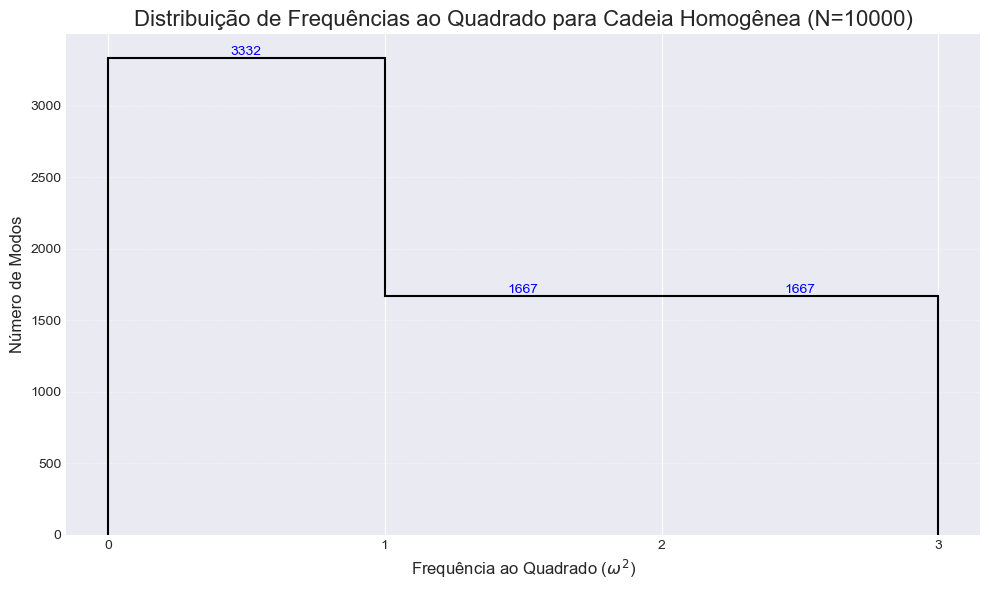

Contagem de modos para Cadeia Homogênea:
  [0-1): 3332
  [1-2): 1667
  [2-3): 1667

Número de modos com frequências ao quadrado >= 3: 3333
Algumas dessas frequências: [3.00072543 3.00072543 3.00181325 3.00181325 3.00290067]...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                          Pode ser um único float (homogênea)
                                          ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- Parâmetros Definidos pelo Usuário ---
N_particles = 10000 # Um número maior de partículas para uma melhor distribuição no histograma
k_spring = 1     # Constante elástica da mola

# --- Escolha o tipo de cadeia para analisar no histograma ---
# Opção 1: Cadeia Homogênea (descomente para usar)
chain_type = "Homogênea"
mass_value_for_chain = 1 # Todas as massas são 'm'


# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# Calcula autovalores
autovalores, _ = eig(B_matrix)

# Os autovalores podem ser complexos devido a pequenas imprecisões numéricas.
# Para frequências, esperamos valores reais e não-negativos.
frequencias_quadrado = np.real(autovalores)
frequencias_quadrado = frequencias_quadrado[frequencias_quadrado >= 0] # Garante que sejam não-negativos

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))

# Definindo os "bins" (intervalos) para o histograma
bins = [0, 1, 2, 3] # Intervalos 0-1, 1-2, 2-3

# Plotando o histograma com as modificações:
# rwidth=1.0 para barras coladas (sem espaço entre elas)
# histtype='step' para apenas o contorno, sem preenchimento
n, bins, patches = plt.hist(frequencias_quadrado, bins=bins,
                            edgecolor='black', # Cor do contorno
                            histtype='step',   # Tipo de histograma: apenas contorno
                            rwidth=1.0,        # Barras coladas
                            linewidth=1.5)     # Espessura da linha do contorno

plt.title(f'Distribuição de Frequências ao Quadrado para Cadeia {chain_type} (N={N_particles})', fontsize=16)
plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)
plt.ylabel('Número de Modos', fontsize=12)
plt.xticks(bins) # Garante que os ticks do eixo X estejam nos limites dos bins
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Adiciona o número de modos em cada barra do histograma
# O posicionamento 'x' precisará de um pequeno ajuste para ficar no centro do bin
for i in range(len(n)):
    x_pos = bins[i] + 0.5 * (bins[i+1] - bins[i]) # Centro do bin
    plt.text(x_pos, n[i] + 0.5,
             f'{int(n[i])}', ha='center', va='bottom', fontsize=10, color='blue')


plt.tight_layout()
plt.show()

# Opcional: Imprimir a contagem exata para cada bin
print(f"Contagem de modos para Cadeia {chain_type}:")
print(f"  [0-1): {np.sum((frequencias_quadrado >= 0) & (frequencias_quadrado < 1))}")
print(f"  [1-2): {np.sum((frequencias_quadrado >= 1) & (frequencias_quadrado < 2))}")
print(f"  [2-3): {np.sum((frequencias_quadrado >= 2) & (frequencias_quadrado < 3))}")

frequencias_fora_intervalo = frequencias_quadrado[frequencias_quadrado >= 3]
if len(frequencias_fora_intervalo) > 0:
    print(f"\nNúmero de modos com frequências ao quadrado >= 3: {len(frequencias_fora_intervalo)}")
    print(f"Algumas dessas frequências: {np.sort(frequencias_fora_intervalo)[:5]}...")

<>:83: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\4291066744.py:83: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)


Massas Aleatórias para o Histograma: [3 4 1 3 3 4 1 1 3 2 3 3 3 3 4 1 4 4 4 3 2 1 2 4 4 2 2 2 4 4 1 1 4 2 2 1 4
 1 1 3 3 3 2 4 4 4 4 3 2 2 3 2 3 4 3 4 4 1 3 1 3 3 1 1 3 2 4 1 4 2 2 2 1 2
 1 2 4 4 3 4 3 4 1 4 3 3 2 1 4 2 4 4 2 2 2 2 2 4 2 1]



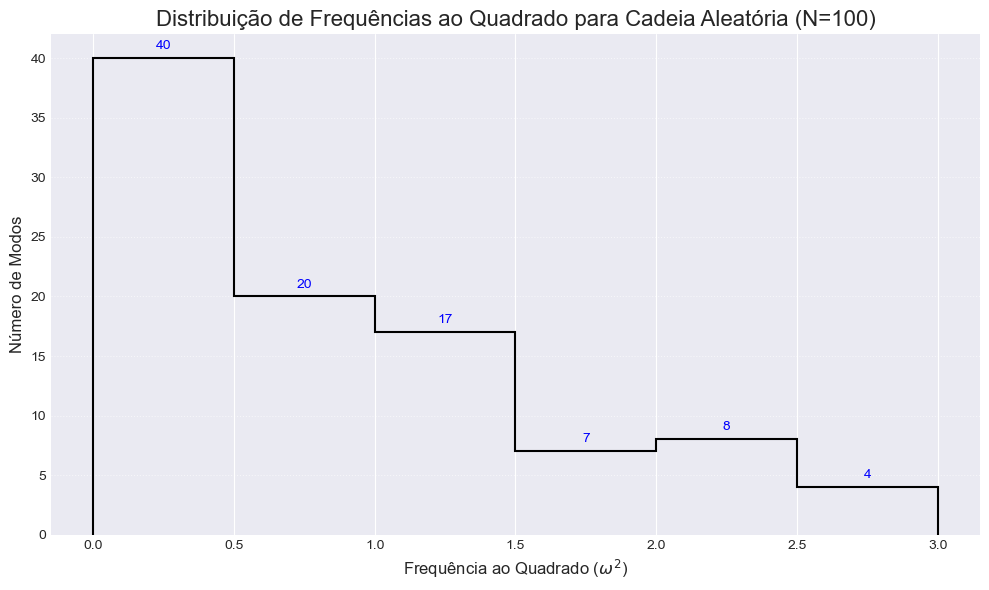

Contagem de modos para Cadeia Aleatória:
  [0-0.5): 40
  [0.5-1): 20
  [1-1.5): 17
  [1.5-2): 7
  [2-2.5): 8
  [2.5-3): 4

Número de modos com frequências ao quadrado >= 3: 4
Algumas dessas frequências: [3.09790994 3.1189075  3.12278382 3.1385532 ]...


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                          Pode ser um único float (homogênea)
                                          ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- Parâmetros Definidos pelo Usuário ---
N_particles = 100 # Um número maior de partículas para uma melhor distribuição no histograma
k_spring = 1     # Constante elástica da mola

# --- Escolha o tipo de cadeia para analisar no histograma ---
# Cadeia Aleatória
chain_type = "Aleatória"
m_base = 1
np.random.seed(42) # Para reprodutibilidade
mass_value_for_chain = np.random.randint(1, 5, N_particles) * m_base
print(f"Massas Aleatórias para o Histograma: {mass_value_for_chain}\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# Calcula autovalores
autovalores, _ = eig(B_matrix)

# Os autovalores podem ser complexos devido a pequenas imprecisões numéricas.
# Para frequências, esperamos valores reais e não-negativos.
frequencias_quadrado = np.real(autovalores)
frequencias_quadrado = frequencias_quadrado[frequencias_quadrado >= 0] # Garante que sejam não-negativos

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))

# Definindo os "bins" (intervalos) para o histograma
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3] # Intervalos

# Plotando o histograma com as modificações:
# rwidth=1.0 para barras coladas (sem espaço entre elas)
# histtype='step' para apenas o contorno, sem preenchimento
n, bins, patches = plt.hist(frequencias_quadrado, bins=bins,
                            edgecolor='black', # Cor do contorno
                            histtype='step',   # Tipo de histograma: apenas contorno
                            rwidth=1.0,        # Barras coladas
                            linewidth=1.5)     # Espessura da linha do contorno

plt.title(f'Distribuição de Frequências ao Quadrado para Cadeia {chain_type} (N={N_particles})', fontsize=16)
plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)
plt.ylabel('Número de Modos', fontsize=12)
plt.xticks(bins) # Garante que os ticks do eixo X estejam nos limites dos bins
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Adiciona o número de modos em cada barra do histograma
# O posicionamento 'x' precisará de um pequeno ajuste para ficar no centro do bin
for i in range(len(n)):
    x_pos = bins[i] + 0.5 * (bins[i+1] - bins[i]) # Centro do bin
    plt.text(x_pos, n[i] + 0.5,
             f'{int(n[i])}', ha='center', va='bottom', fontsize=10, color='blue')


plt.tight_layout()
plt.show()
print(f"Contagem de modos para Cadeia {chain_type}:")
print(f"  [0-0.5): {np.sum((frequencias_quadrado >= 0) & (frequencias_quadrado < 0.5))}")
print(f"  [0.5-1): {np.sum((frequencias_quadrado >= 0.5) & (frequencias_quadrado < 1))}")
print(f"  [1-1.5): {np.sum((frequencias_quadrado >= 1) & (frequencias_quadrado < 1.5))}")
print(f"  [1.5-2): {np.sum((frequencias_quadrado >= 1.5) & (frequencias_quadrado < 2))}")
print(f"  [2-2.5): {np.sum((frequencias_quadrado >= 2) & (frequencias_quadrado < 2.5))}")
print(f"  [2.5-3): {np.sum((frequencias_quadrado >= 2.5) & (frequencias_quadrado < 3))}")

frequencias_fora_intervalo = frequencias_quadrado[frequencias_quadrado >= 3]
if len(frequencias_fora_intervalo) > 0:
    print(f"\nNúmero de modos com frequências ao quadrado >= 3: {len(frequencias_fora_intervalo)}")
    print(f"Algumas dessas frequências: {np.sort(frequencias_fora_intervalo)[:5]}...")

<>:83: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\2075215225.py:83: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)


Massas Aleatórias para o Histograma: [3 4 1 3 3 4 1 1 3 2 3 3 3 3 4 1 4 4 4 3 2 1 2 4 4 2 2 2 4 4 1 1 4 2 2 1 4
 1 1 3 3 3 2 4 4 4 4 3 2 2 3 2 3 4 3 4 4 1 3 1 3 3 1 1 3 2 4 1 4 2 2 2 1 2
 1 2 4 4 3 4 3 4 1 4 3 3 2 1 4 2 4 4 2 2 2 2 2 4 2 1 3 2 2 4 2 2 2 4 2 3 4
 3 4 2 3 4 1 2 4 1 4 1 2 3 1 4 2 1 4 4 4 1 1 1 3 1 1 1 3 1 4 1 4 4 4 3 3 3
 1 4 3 3 1 3 1 2 3 2 1 4 3 1 4 4 2 1 4 3 3 2 4 1 3 4 4 2 3 3 1 3 1 3 2 3 1
 1 2 3 3 2 3 3 1 3 3 2 2 4 1 3 3 4 3 1 4 1 4 4 2 1 3 3 1 3 3 1 4 1 4 3 3 3
 2 4 2 2 1 2 1 1 2 4 4 4 4 4 2 2 3 4 2 3 4 1 3 2 1 1 1 3 2 1 4 1 1 3 3 2 4
 3 1 2 1 1 3 2 4 4 3 3 2 4 4 4 1 4 1 2 1 2 4 4 2 3 2 3 1 1 1 4 1 3 1 2 2 4
 2 3 1 4 1 1 3 2 2 1 4 2 4 2 4 3 4 3 3 4 3 1 3 2 4 1 4 2 2 2 3 3 4 4 1 1 4
 3 2 4 1 3 4 4 3 4 3 2 3 3 3 4 4 3 4 1 1 4 4 3 2 4 1 3 4 1 1 2 3 3 2 2 3 3
 4 4 2 4 1 4 4 1 2 1 4 2 4 1 1 4 3 3 1 1 3 3 4 4 3 4 4 2 4 1 4 4 3 1 4 4 2
 4 4 2 3 4 2 1 3 1 1 2 4 2 2 2 2 3 4 1 1 4 1 4 1 2 1 4 4 4 4 4 3 3 1 4 1 4
 4 3 3 2 3 2 2 2 2 2 1 3 2 4 3 3 2 1 2 1 4 3 4 1 1 4 1 4 3 4 3 

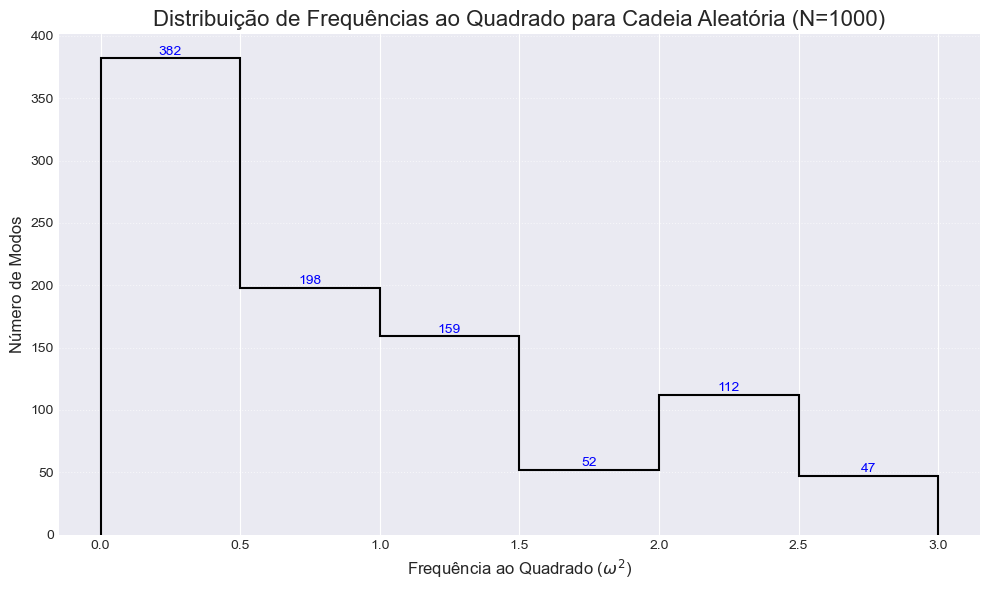

Contagem de modos para Cadeia Aleatória:
  [0-0.5): 382
  [0.5-1): 198
  [1-1.5): 159
  [1.5-2): 52
  [2-2.5): 112
  [2.5-3): 47

Número de modos com frequências ao quadrado >= 3: 49
Algumas dessas frequências: [3.08326235 3.09717578 3.09736044 3.09737368 3.09757602]...


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                          Pode ser um único float (homogênea)
                                          ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- Parâmetros Definidos pelo Usuário ---
N_particles = 1000 # Um número maior de partículas para uma melhor distribuição no histograma
k_spring = 1     # Constante elástica da mola

# --- Escolha o tipo de cadeia para analisar no histograma ---
# Cadeia Aleatória
chain_type = "Aleatória"
m_base = 1
np.random.seed(42) # Para reprodutibilidade
mass_value_for_chain = np.random.randint(1, 5, N_particles) * m_base
print(f"Massas Aleatórias para o Histograma: {mass_value_for_chain}\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# Calcula autovalores
autovalores, _ = eig(B_matrix)

# Os autovalores podem ser complexos devido a pequenas imprecisões numéricas.
# Para frequências, esperamos valores reais e não-negativos.
frequencias_quadrado = np.real(autovalores)
frequencias_quadrado = frequencias_quadrado[frequencias_quadrado >= 0] # Garante que sejam não-negativos

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))

# Definindo os "bins" (intervalos) para o histograma
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3] # Intervalos

# Plotando o histograma com as modificações:
# rwidth=1.0 para barras coladas (sem espaço entre elas)
# histtype='step' para apenas o contorno, sem preenchimento
n, bins, patches = plt.hist(frequencias_quadrado, bins=bins,
                            edgecolor='black', # Cor do contorno
                            histtype='step',   # Tipo de histograma: apenas contorno
                            rwidth=1.0,        # Barras coladas
                            linewidth=1.5)     # Espessura da linha do contorno

plt.title(f'Distribuição de Frequências ao Quadrado para Cadeia {chain_type} (N={N_particles})', fontsize=16)
plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)
plt.ylabel('Número de Modos', fontsize=12)
plt.xticks(bins) # Garante que os ticks do eixo X estejam nos limites dos bins
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Adiciona o número de modos em cada barra do histograma
# O posicionamento 'x' precisará de um pequeno ajuste para ficar no centro do bin
for i in range(len(n)):
    x_pos = bins[i] + 0.5 * (bins[i+1] - bins[i]) # Centro do bin
    plt.text(x_pos, n[i] + 0.5,
             f'{int(n[i])}', ha='center', va='bottom', fontsize=10, color='blue')


plt.tight_layout()
plt.show()
print(f"Contagem de modos para Cadeia {chain_type}:")
print(f"  [0-0.5): {np.sum((frequencias_quadrado >= 0) & (frequencias_quadrado < 0.5))}")
print(f"  [0.5-1): {np.sum((frequencias_quadrado >= 0.5) & (frequencias_quadrado < 1))}")
print(f"  [1-1.5): {np.sum((frequencias_quadrado >= 1) & (frequencias_quadrado < 1.5))}")
print(f"  [1.5-2): {np.sum((frequencias_quadrado >= 1.5) & (frequencias_quadrado < 2))}")
print(f"  [2-2.5): {np.sum((frequencias_quadrado >= 2) & (frequencias_quadrado < 2.5))}")
print(f"  [2.5-3): {np.sum((frequencias_quadrado >= 2.5) & (frequencias_quadrado < 3))}")

frequencias_fora_intervalo = frequencias_quadrado[frequencias_quadrado >= 3]
if len(frequencias_fora_intervalo) > 0:
    print(f"\nNúmero de modos com frequências ao quadrado >= 3: {len(frequencias_fora_intervalo)}")
    print(f"Algumas dessas frequências: {np.sort(frequencias_fora_intervalo)[:5]}...")

<>:83: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\1483649667.py:83: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)


Massas Aleatórias para o Histograma: [3 4 1 ... 2 2 1]



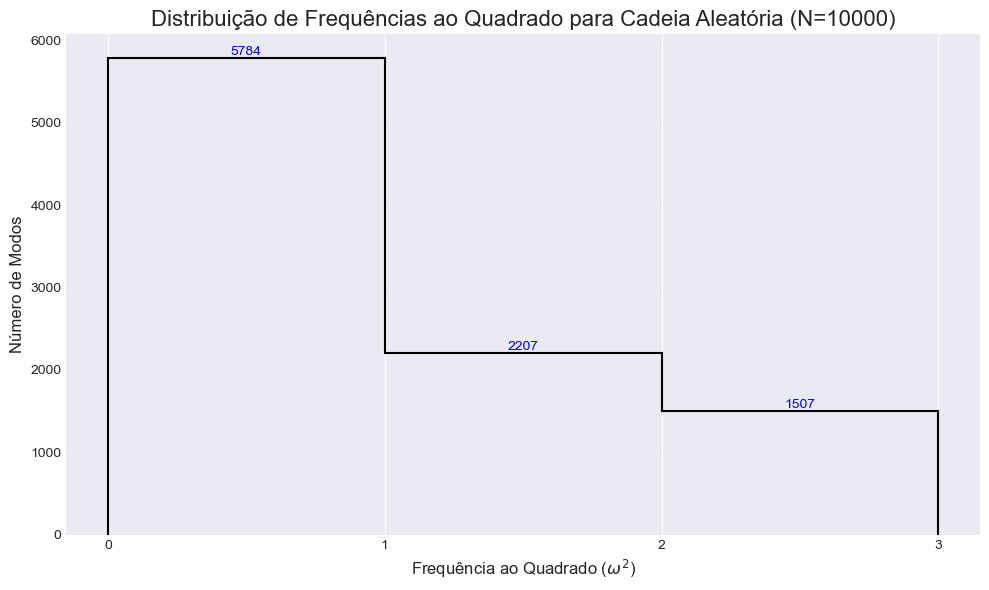

Contagem de modos para Cadeia Aleatória:
  [0-1): 5784
  [1-2): 2207
  [2-3): 1507

Número de modos com frequências ao quadrado >= 3: 502
Algumas dessas frequências: [3.03969533 3.05073821 3.05081955 3.05084612 3.05623726]...


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                          Pode ser um único float (homogênea)
                                          ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- Parâmetros Definidos pelo Usuário ---
N_particles = 10000 # Um número maior de partículas para uma melhor distribuição no histograma
k_spring = 1     # Constante elástica da mola

# --- Escolha o tipo de cadeia para analisar no histograma ---
# Cadeia Aleatória
chain_type = "Aleatória"
m_base = 1
np.random.seed(42) # Para reprodutibilidade
mass_value_for_chain = np.random.randint(1, 5, N_particles) * m_base
print(f"Massas Aleatórias para o Histograma: {mass_value_for_chain}\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# Calcula autovalores
autovalores, _ = eig(B_matrix)

# Os autovalores podem ser complexos devido a pequenas imprecisões numéricas.
# Para frequências, esperamos valores reais e não-negativos.
frequencias_quadrado = np.real(autovalores)
frequencias_quadrado = frequencias_quadrado[frequencias_quadrado >= 0] # Garante que sejam não-negativos

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))

# Definindo os "bins" (intervalos) para o histograma
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3] # Intervalos

# Plotando o histograma com as modificações:
# rwidth=1.0 para barras coladas (sem espaço entre elas)
# histtype='step' para apenas o contorno, sem preenchimento
n, bins, patches = plt.hist(frequencias_quadrado, bins=bins,
                            edgecolor='black', # Cor do contorno
                            histtype='step',   # Tipo de histograma: apenas contorno
                            rwidth=1.0,        # Barras coladas
                            linewidth=1.5)     # Espessura da linha do contorno

plt.title(f'Distribuição de Frequências ao Quadrado para Cadeia {chain_type} (N={N_particles})', fontsize=16)
plt.xlabel('Frequência ao Quadrado ($\omega^2$)', fontsize=12)
plt.ylabel('Número de Modos', fontsize=12)
plt.xticks(bins) # Garante que os ticks do eixo X estejam nos limites dos bins
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Adiciona o número de modos em cada barra do histograma
# O posicionamento 'x' precisará de um pequeno ajuste para ficar no centro do bin
for i in range(len(n)):
    x_pos = bins[i] + 0.5 * (bins[i+1] - bins[i]) # Centro do bin
    plt.text(x_pos, n[i] + 0.5,
             f'{int(n[i])}', ha='center', va='bottom', fontsize=10, color='blue')


plt.tight_layout()
plt.show()

# Opcional: Imprimir a contagem exata para cada bin
print(f"Contagem de modos para Cadeia {chain_type}:")
print(f"  [0-0.5): {np.sum((frequencias_quadrado >= 0) & (frequencias_quadrado < 0.5))}")
print(f"  [0.5-1): {np.sum((frequencias_quadrado >= 0.5) & (frequencias_quadrado < 1))}")
print(f"  [1-1.5): {np.sum((frequencias_quadrado >= 1) & (frequencias_quadrado < 1.5))}")
print(f"  [1.5-2): {np.sum((frequencias_quadrado >= 1.5) & (frequencias_quadrado < 2))}")
print(f"  [2-2.5): {np.sum((frequencias_quadrado >= 2) & (frequencias_quadrado < 2.5))}")
print(f"  [2.5-3): {np.sum((frequencias_quadrado >= 2.5) & (frequencias_quadrado < 3))}")

frequencias_fora_intervalo = frequencias_quadrado[frequencias_quadrado >= 3]
if len(frequencias_fora_intervalo) > 0:
    print(f"\nNúmero de modos com frequências ao quadrado >= 3: {len(frequencias_fora_intervalo)}")
    print(f"Algumas dessas frequências: {np.sort(frequencias_fora_intervalo)[:5]}...")

3. Deslocamentos Relativos (Modos Normais)
- Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:
- Às cinco menores frequências (modos de baixa energia)
- Às cinco maiores frequências (modos de alta energia)
- Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.

Analisando deslocamentos para uma cadeia 'Aleatória' com N=100 partículas.
Massas (primeiras 20): [3 4 1 3 3 4 1 1 3 2 3 3 3 3 4 1 4 4 4 3]...

--- Plotando os 5 modos de menor frequência (baixa energia) ---


<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\2675193198.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\2675193198.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')


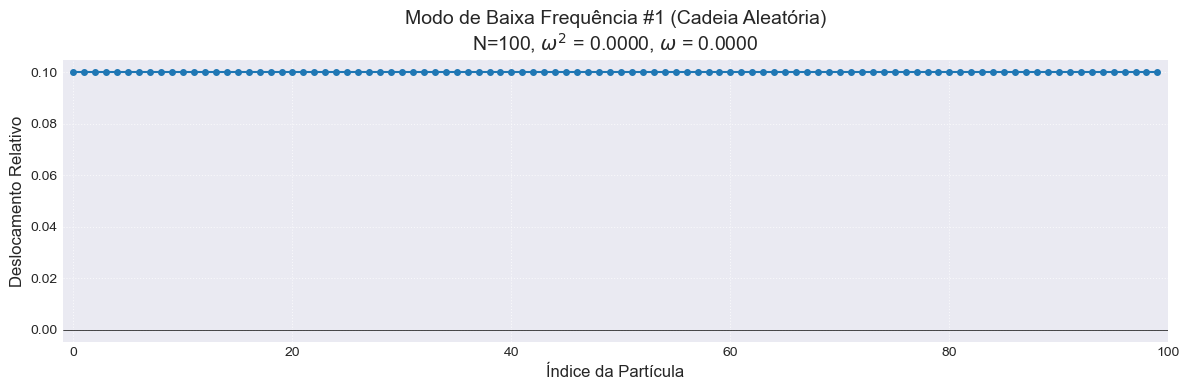

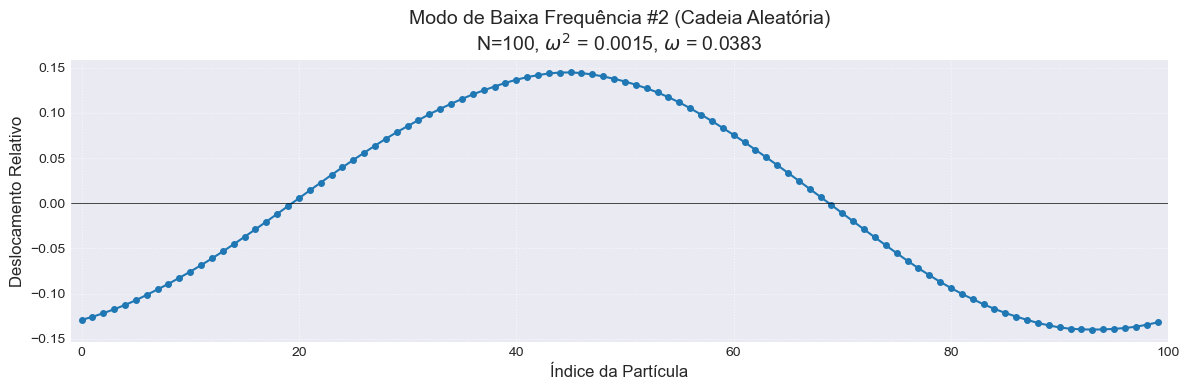

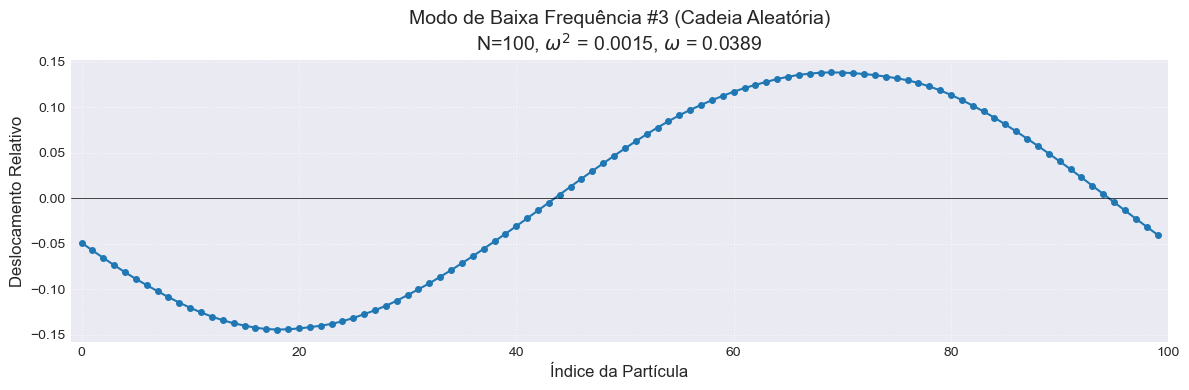

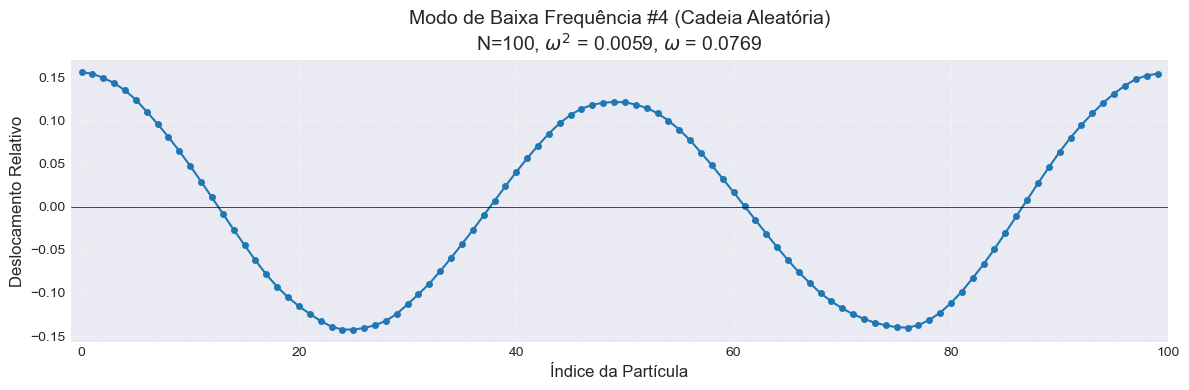

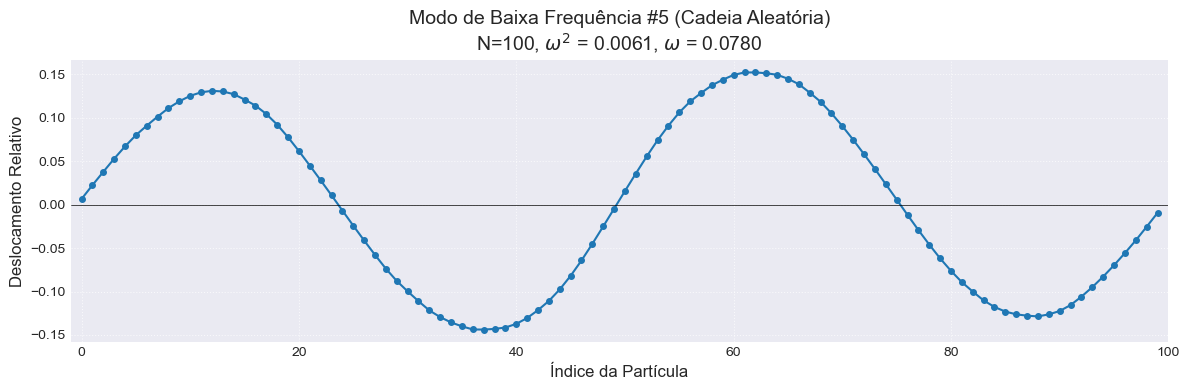


--- Plotando os 5 modos de maior frequência (alta energia) ---


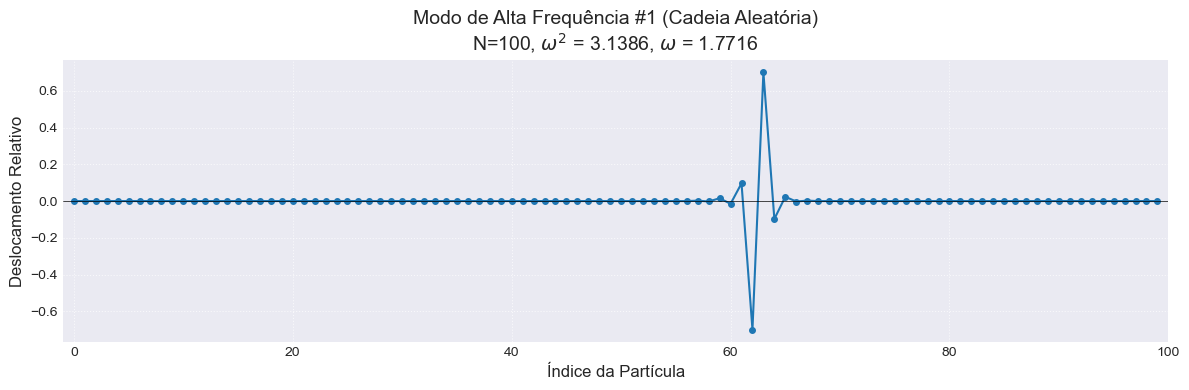

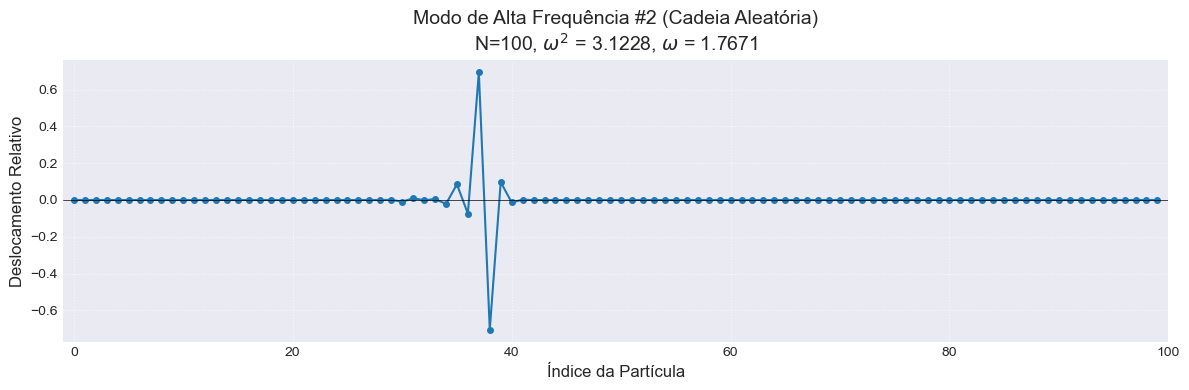

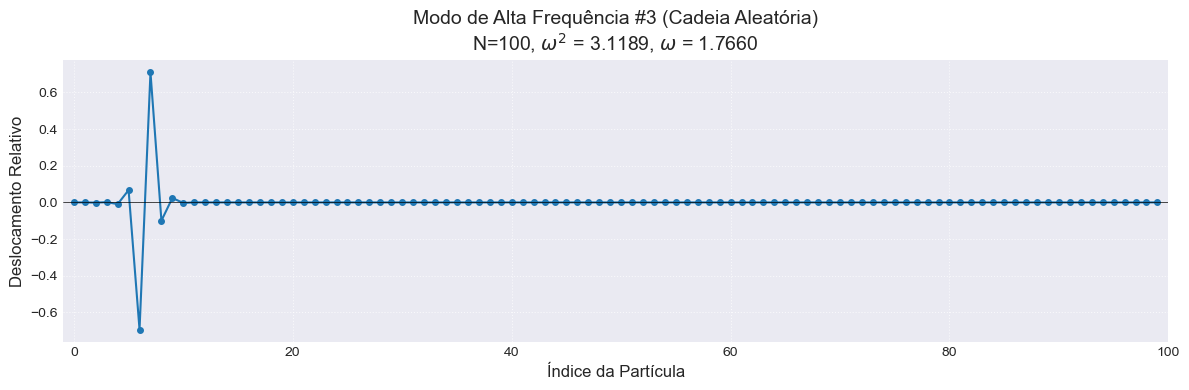

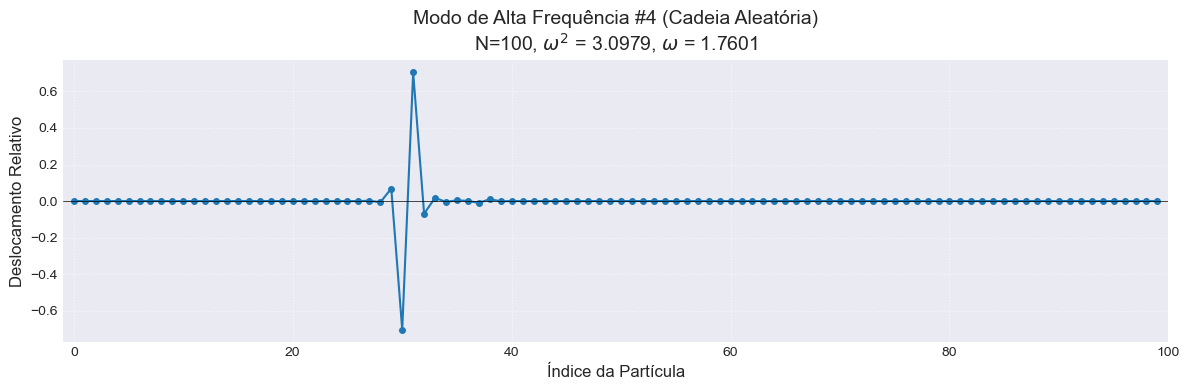

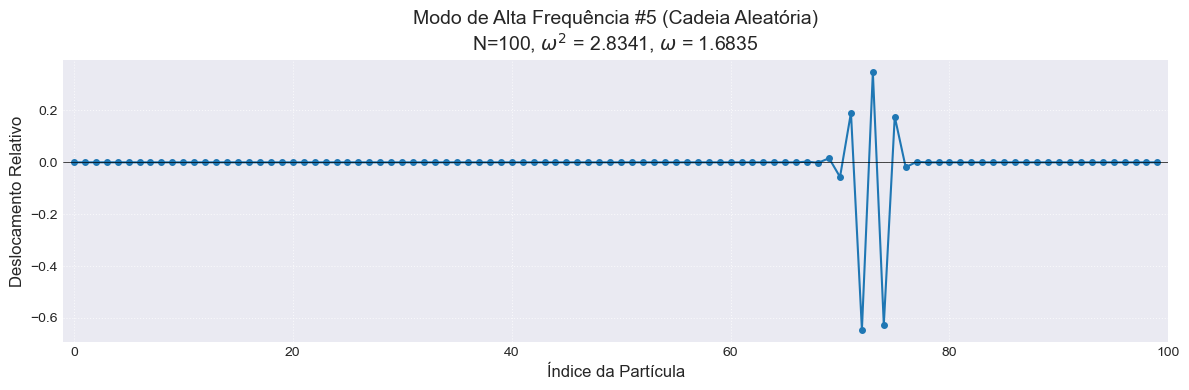

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                            Pode ser um único float (homogênea)
                                            ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- NOVA FUNÇÃO: Para plotar os deslocamentos ---
def plot_normal_mode(mode_vector, omega_squared, mode_rank, N, chain_type, mode_type):
    """
    Plota o deslocamento relativo dos átomos para um modo normal específico.

    Args:
        mode_vector (np.array): O autovetor (modo normal) a ser plotado.
        omega_squared (float): O autovalor (frequência ao quadrado) correspondente.
        mode_rank (int): A ordem do modo (1º, 2º, etc.) para o título.
        N (int): O número de partículas.
        chain_type (str): O tipo de cadeia (ex: 'Aleatória').
        mode_type (str): O tipo de modo (ex: 'Baixa Frequência', 'Alta Frequência').
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(12, 4))
    
    # Plota os deslocamentos usando marcadores e uma linha para conectar
    plt.plot(range(N), mode_vector, '-o', markersize=4, label='Deslocamento')
    
    # Adiciona uma linha horizontal em y=0 como referência
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    omega = np.sqrt(omega_squared) if omega_squared > 1e-9 else 0
    title = (f'Modo de {mode_type} #{mode_rank} (Cadeia {chain_type})\n'
             f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel('Índice da Partícula', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xlim(-1, N) # Adiciona um pequeno espaço nas bordas do eixo x
    plt.tight_layout()
    plt.show()


# --- Parâmetros Definidos pelo Usuário ---
# N foi reduzido para uma visualização clara dos modos de deslocamento.
# Com 10.000 partículas, os padrões de onda seriam muito densos para serem vistos.
N_particles = 100 
k_spring = 1

# --- Escolha o tipo de cadeia para analisar ---
# Cadeia Aleatória
chain_type = "Aleatória"
m_base = 1
np.random.seed(42) # Para reprodutibilidade
mass_value_for_chain = np.random.randint(1, 5, N_particles) * m_base

print(f"Analisando deslocamentos para uma cadeia '{chain_type}' com N={N_particles} partículas.")
print(f"Massas (primeiras 20): {mass_value_for_chain[:20]}...\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# --- MODIFICAÇÃO: Obter autovalores E autovetores ---
# A função `eig` retorna os autovalores e os autovetores correspondentes.
# Os autovetores são as colunas da matriz `autovetores`.
autovalores, autovetores = eig(B_matrix)

frequencias_quadrado = autovalores
modos_normais = autovetores

# --- NOVO: Ordenar frequências e modos ---
# `np.argsort` retorna os índices que ordenariam o array de frequências.
sorted_indices = np.argsort(frequencias_quadrado)

# Usa os índices ordenados para reorganizar tanto as frequências quanto os modos normais.
# Isso garante que cada frequência ainda corresponda ao seu modo correto.
sorted_frequencias_quadrado = frequencias_quadrado[sorted_indices]
# As colunas dos autovetores são reordenadas para corresponder às frequências ordenadas.
sorted_modos_normais = modos_normais[:, sorted_indices]

# --- Apresentação dos Gráficos de Deslocamento ---

# 1. Plota os 5 modos de MENOR frequência
print("--- Plotando os 5 modos de menor frequência (baixa energia) ---")
for i in range(5):
    # O modo i-ésimo menor corresponde à i-ésima coluna dos vetores ordenados
    mode_vector = sorted_modos_normais[:, i]
    omega_sq = sorted_frequencias_quadrado[i]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Baixa Frequência")

# 2. Plota os 5 modos de MAIOR frequência
print("\n--- Plotando os 5 modos de maior frequência (alta energia) ---")
for i in range(5):
    # O i-ésimo modo maior está no final do array ordenado.
    # Usamos indexação negativa: -1 para o último, -2 para o penúltimo, etc.
    mode_index_from_end = - (i + 1)
    mode_vector = sorted_modos_normais[:, mode_index_from_end]
    omega_sq = sorted_frequencias_quadrado[mode_index_from_end]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Alta Frequência")

<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\3301238468.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\3301238468.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')


Analisando deslocamentos para uma cadeia 'Aleatória' com N=1000 partículas.
Massas (primeiras 20): [3 4 1 3 3 4 1 1 3 2 3 3 3 3 4 1 4 4 4 3]...

--- Plotando os 5 modos de menor frequência (baixa energia) ---


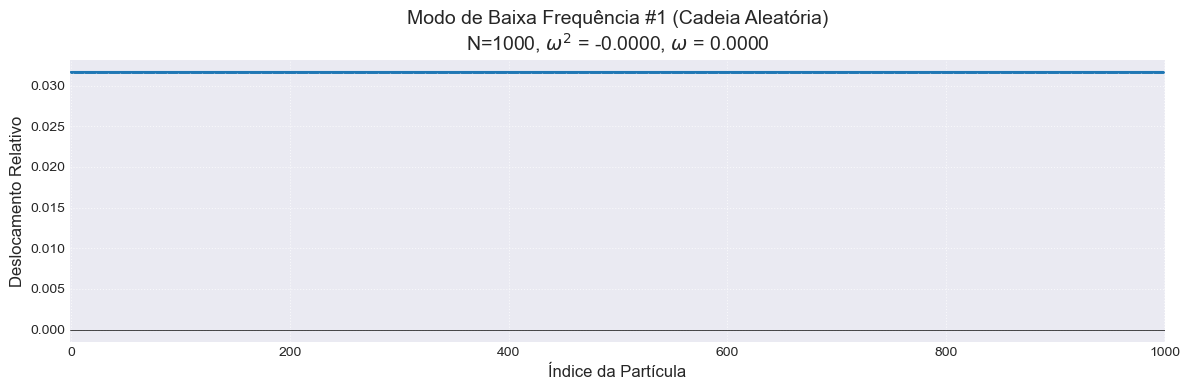

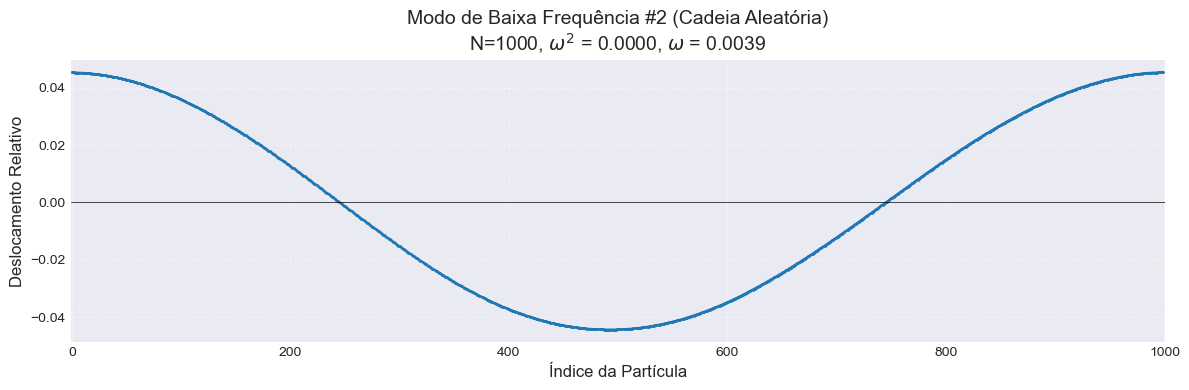

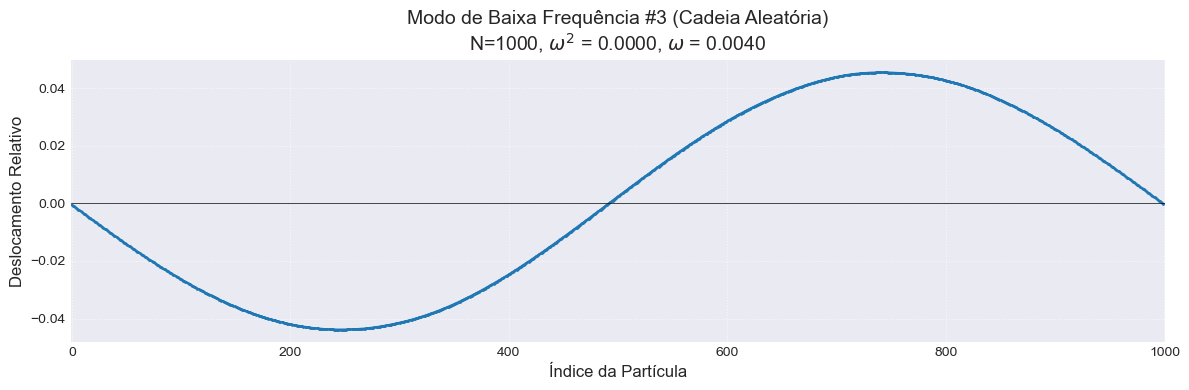

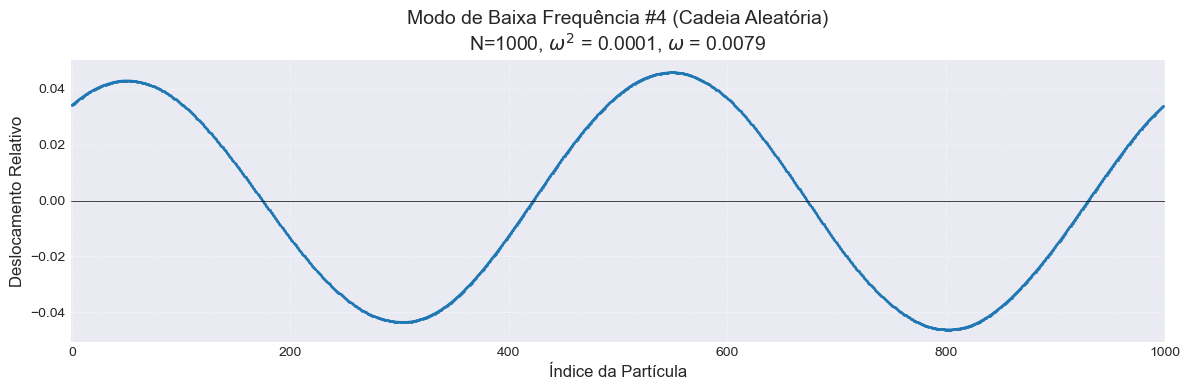

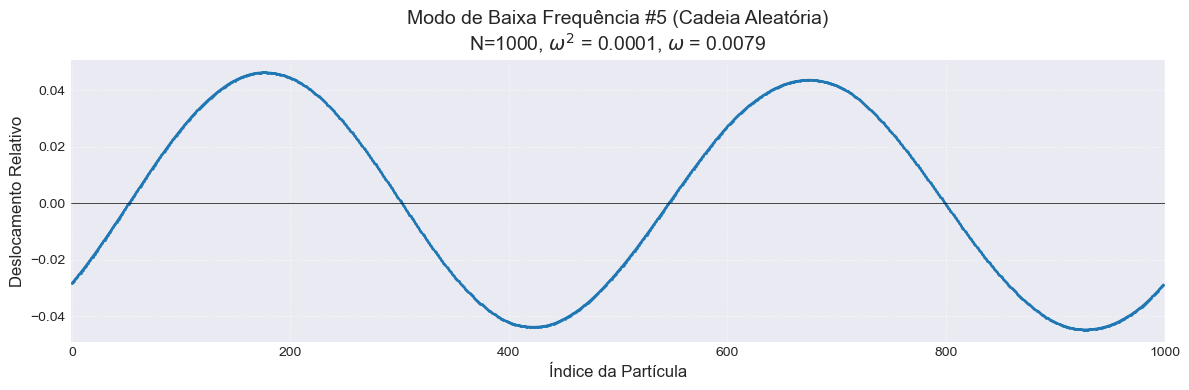


--- Plotando os 5 modos de maior frequência (alta energia) ---


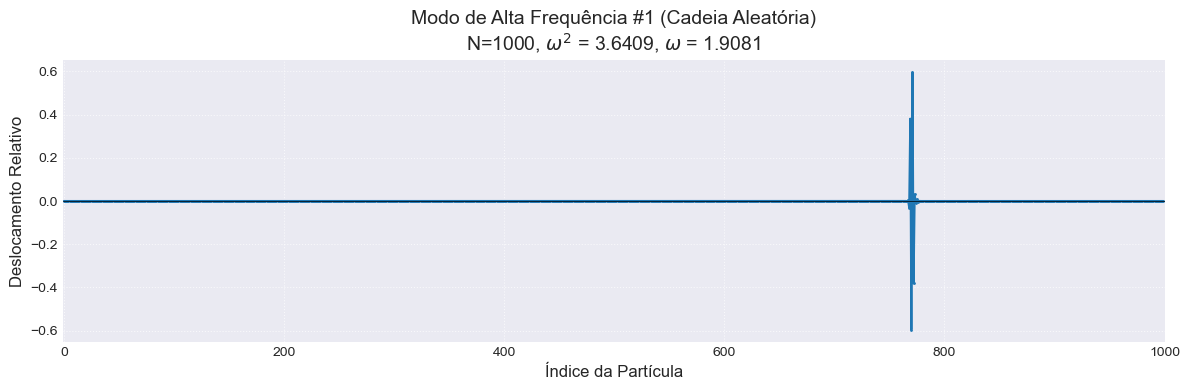

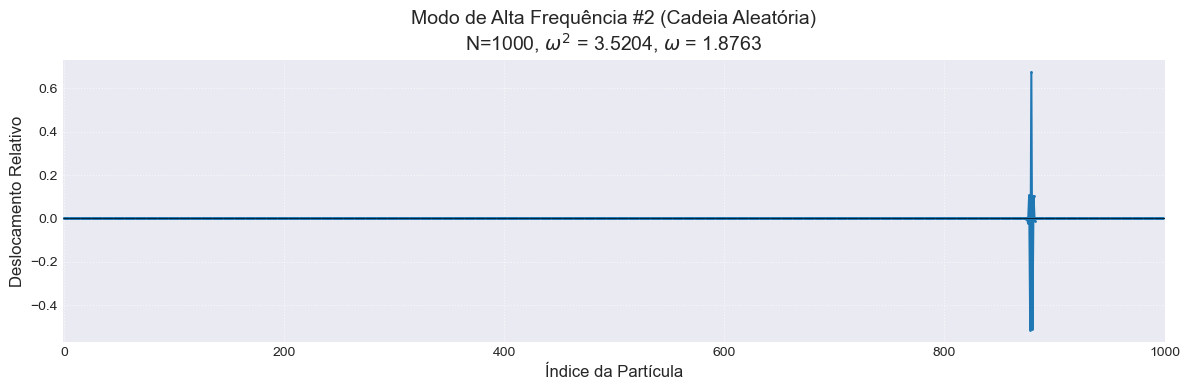

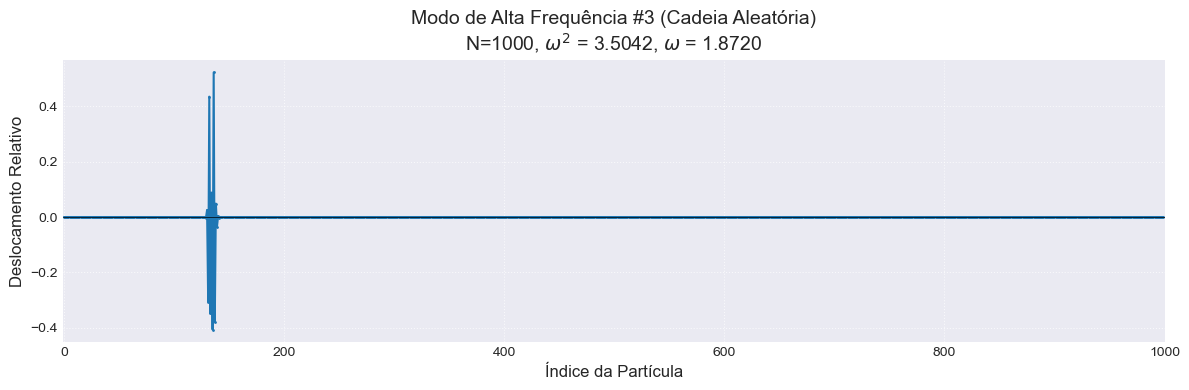

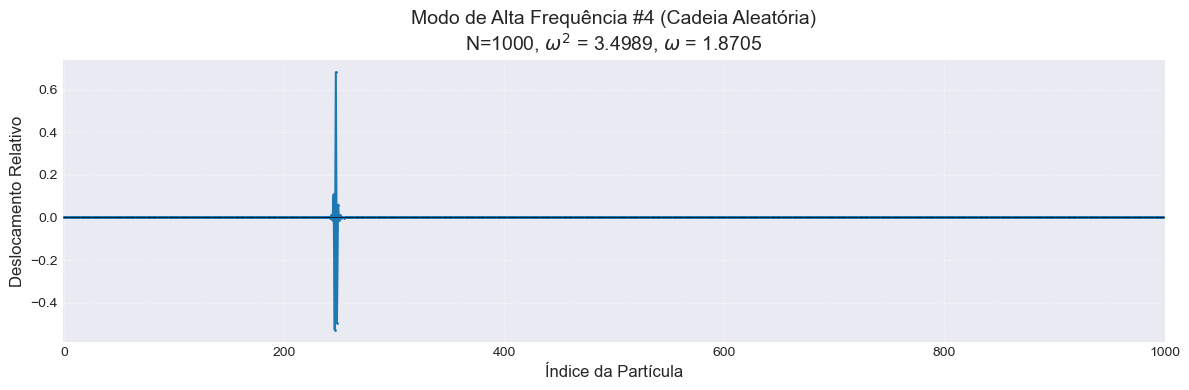

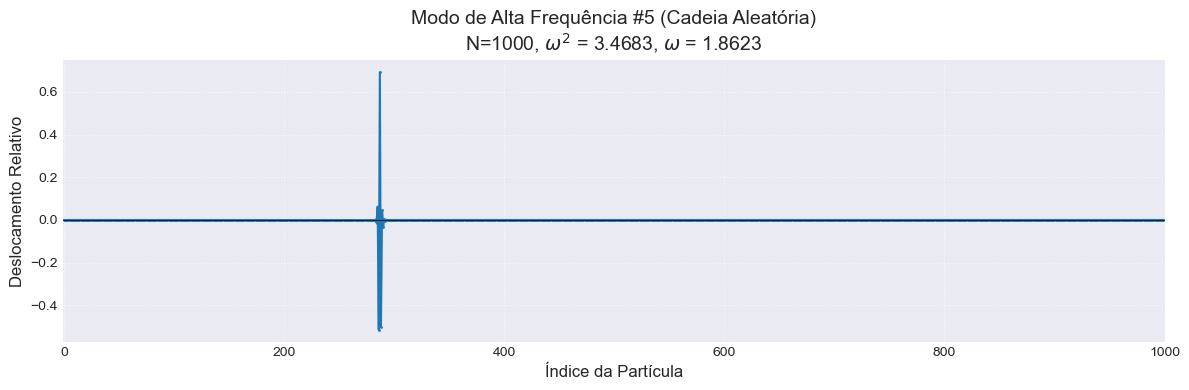

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                            Pode ser um único float (homogênea)
                                            ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- NOVA FUNÇÃO: Para plotar os deslocamentos ---
def plot_normal_mode(mode_vector, omega_squared, mode_rank, N, chain_type, mode_type):
    """
    Plota o deslocamento relativo dos átomos para um modo normal específico.

    Args:
        mode_vector (np.array): O autovetor (modo normal) a ser plotado.
        omega_squared (float): O autovalor (frequência ao quadrado) correspondente.
        mode_rank (int): A ordem do modo (1º, 2º, etc.) para o título.
        N (int): O número de partículas.
        chain_type (str): O tipo de cadeia (ex: 'Aleatória').
        mode_type (str): O tipo de modo (ex: 'Baixa Frequência', 'Alta Frequência').
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(12, 4))
    
    # Plota os deslocamentos usando marcadores e uma linha para conectar
    plt.plot(range(N), mode_vector, '-o', markersize=1, label='Deslocamento')
    
    # Adiciona uma linha horizontal em y=0 como referência
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    omega = np.sqrt(omega_squared) if omega_squared > 1e-9 else 0
    title = (f'Modo de {mode_type} #{mode_rank} (Cadeia {chain_type})\n'
             f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel('Índice da Partícula', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xlim(-1, N) # Adiciona um pequeno espaço nas bordas do eixo x
    plt.tight_layout()
    plt.show()


# --- Parâmetros Definidos pelo Usuário ---
# N foi reduzido para uma visualização clara dos modos de deslocamento.
# Com 10.000 partículas, os padrões de onda seriam muito densos para serem vistos.
N_particles = 1000 
k_spring = 1

# --- Escolha o tipo de cadeia para analisar ---
# Cadeia Aleatória
chain_type = "Aleatória"
m_base = 1
np.random.seed(42) # Para reprodutibilidade
mass_value_for_chain = np.random.randint(1, 5, N_particles) * m_base

print(f"Analisando deslocamentos para uma cadeia '{chain_type}' com N={N_particles} partículas.")
print(f"Massas (primeiras 20): {mass_value_for_chain[:20]}...\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# --- MODIFICAÇÃO: Obter autovalores E autovetores ---
# A função `eig` retorna os autovalores e os autovetores correspondentes.
# Os autovetores são as colunas da matriz `autovetores`.
autovalores, autovetores = eig(B_matrix)

frequencias_quadrado = autovalores
modos_normais = autovetores

# --- NOVO: Ordenar frequências e modos ---
# `np.argsort` retorna os índices que ordenariam o array de frequências.
sorted_indices = np.argsort(frequencias_quadrado)

# Usa os índices ordenados para reorganizar tanto as frequências quanto os modos normais.
# Isso garante que cada frequência ainda corresponda ao seu modo correto.
sorted_frequencias_quadrado = frequencias_quadrado[sorted_indices]
# As colunas dos autovetores são reordenadas para corresponder às frequências ordenadas.
sorted_modos_normais = modos_normais[:, sorted_indices]

# --- Apresentação dos Gráficos de Deslocamento ---

# 1. Plota os 5 modos de MENOR frequência
print("--- Plotando os 5 modos de menor frequência (baixa energia) ---")
for i in range(5):
    # O modo i-ésimo menor corresponde à i-ésima coluna dos vetores ordenados
    mode_vector = sorted_modos_normais[:, i]
    omega_sq = sorted_frequencias_quadrado[i]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Baixa Frequência")

# 2. Plota os 5 modos de MAIOR frequência
print("\n--- Plotando os 5 modos de maior frequência (alta energia) ---")
for i in range(5):
    # O i-ésimo modo maior está no final do array ordenado.
    # Usamos indexação negativa: -1 para o último, -2 para o penúltimo, etc.
    mode_index_from_end = - (i + 1)
    mode_vector = sorted_modos_normais[:, mode_index_from_end]
    omega_sq = sorted_frequencias_quadrado[mode_index_from_end]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Alta Frequência")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                            Pode ser um único float (homogênea)
                                            ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- NOVA FUNÇÃO: Para plotar os deslocamentos ---
def plot_normal_mode(mode_vector, omega_squared, mode_rank, N, chain_type, mode_type):
    """
    Plota o deslocamento relativo dos átomos para um modo normal específico.

    Args:
        mode_vector (np.array): O autovetor (modo normal) a ser plotado.
        omega_squared (float): O autovalor (frequência ao quadrado) correspondente.
        mode_rank (int): A ordem do modo (1º, 2º, etc.) para o título.
        N (int): O número de partículas.
        chain_type (str): O tipo de cadeia (ex: 'Aleatória').
        mode_type (str): O tipo de modo (ex: 'Baixa Frequência', 'Alta Frequência').
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(12, 4))
    
    # Plota os deslocamentos usando marcadores e uma linha para conectar
    plt.plot(range(N), mode_vector, '-o', markersize=4, label='Deslocamento')
    
    # Adiciona uma linha horizontal em y=0 como referência
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    omega = np.sqrt(omega_squared) if omega_squared > 1e-9 else 0
    title = (f'Modo de {mode_type} #{mode_rank} (Cadeia {chain_type})\n'
             f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel('Índice da Partícula', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xlim(-1, N) # Adiciona um pequeno espaço nas bordas do eixo x
    plt.tight_layout()
    plt.show()


# --- Parâmetros Definidos pelo Usuário ---
# N foi reduzido para uma visualização clara dos modos de deslocamento.
# Com 10.000 partículas, os padrões de onda seriam muito densos para serem vistos.
N_particles = 10000 
k_spring = 1

# --- Escolha o tipo de cadeia para analisar ---
# Cadeia Aleatória
chain_type = "Aleatória"
m_base = 1
np.random.seed(42) # Para reprodutibilidade
mass_value_for_chain = np.random.randint(1, 5, N_particles) * m_base

print(f"Analisando deslocamentos para uma cadeia '{chain_type}' com N={N_particles} partículas.")
print(f"Massas (primeiras 20): {mass_value_for_chain[:20]}...\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# --- MODIFICAÇÃO: Obter autovalores E autovetores ---
# A função `eig` retorna os autovalores e os autovetores correspondentes.
# Os autovetores são as colunas da matriz `autovetores`.
autovalores, autovetores = eig(B_matrix)

frequencias_quadrado = autovalores
modos_normais = autovetores

# --- NOVO: Ordenar frequências e modos ---
# `np.argsort` retorna os índices que ordenariam o array de frequências.
sorted_indices = np.argsort(frequencias_quadrado)

# Usa os índices ordenados para reorganizar tanto as frequências quanto os modos normais.
# Isso garante que cada frequência ainda corresponda ao seu modo correto.
sorted_frequencias_quadrado = frequencias_quadrado[sorted_indices]
# As colunas dos autovetores são reordenadas para corresponder às frequências ordenadas.
sorted_modos_normais = modos_normais[:, sorted_indices]

# --- Apresentação dos Gráficos de Deslocamento ---

# 1. Plota os 5 modos de MENOR frequência
print("--- Plotando os 5 modos de menor frequência (baixa energia) ---")
for i in range(5):
    # O modo i-ésimo menor corresponde à i-ésima coluna dos vetores ordenados
    mode_vector = sorted_modos_normais[:, i]
    omega_sq = sorted_frequencias_quadrado[i]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Baixa Frequência")

# 2. Plota os 5 modos de MAIOR frequência
print("\n--- Plotando os 5 modos de maior frequência (alta energia) ---")
for i in range(5):
    # O i-ésimo modo maior está no final do array ordenado.
    # Usamos indexação negativa: -1 para o último, -2 para o penúltimo, etc.
    mode_index_from_end = - (i + 1)
    mode_vector = sorted_modos_normais[:, mode_index_from_end]
    omega_sq = sorted_frequencias_quadrado[mode_index_from_end]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Alta Frequência")

<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\2933257250.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\2933257250.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')


Analisando deslocamentos para uma cadeia 'Homogenea' com N=100 partículas.
Massas (primeiras 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

--- Plotando os 5 modos de menor frequência (baixa energia) ---


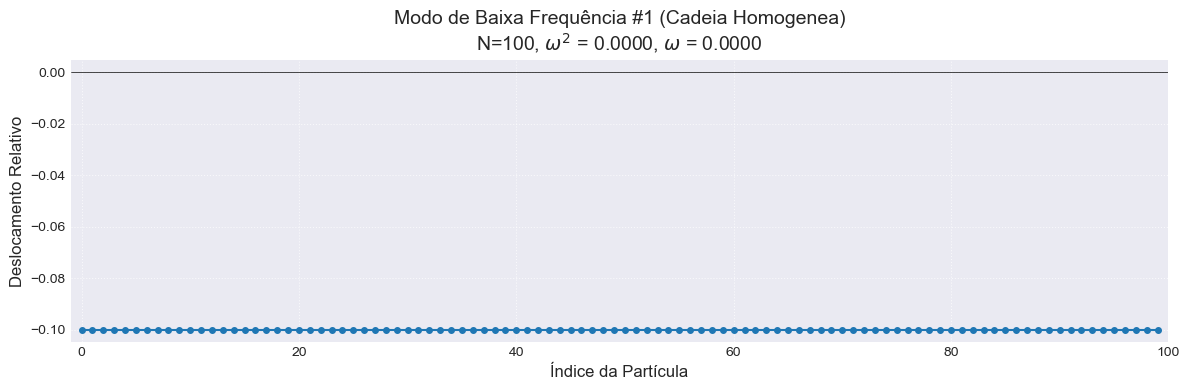

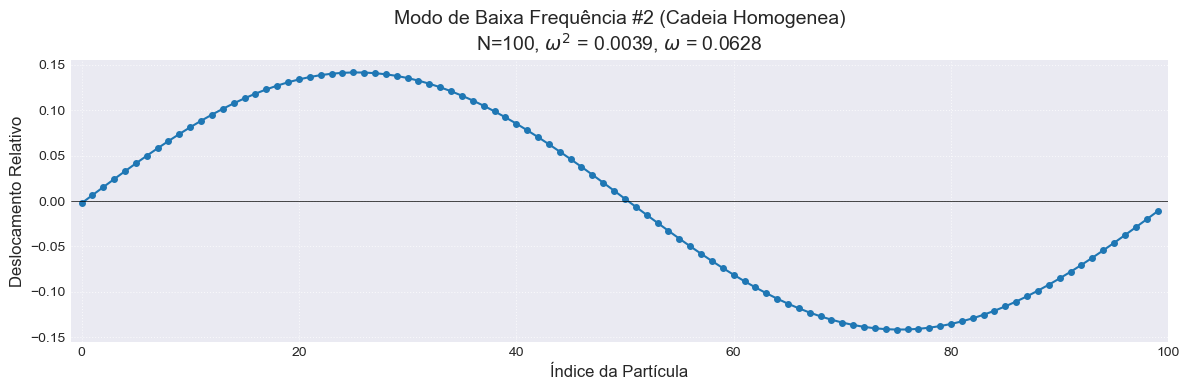

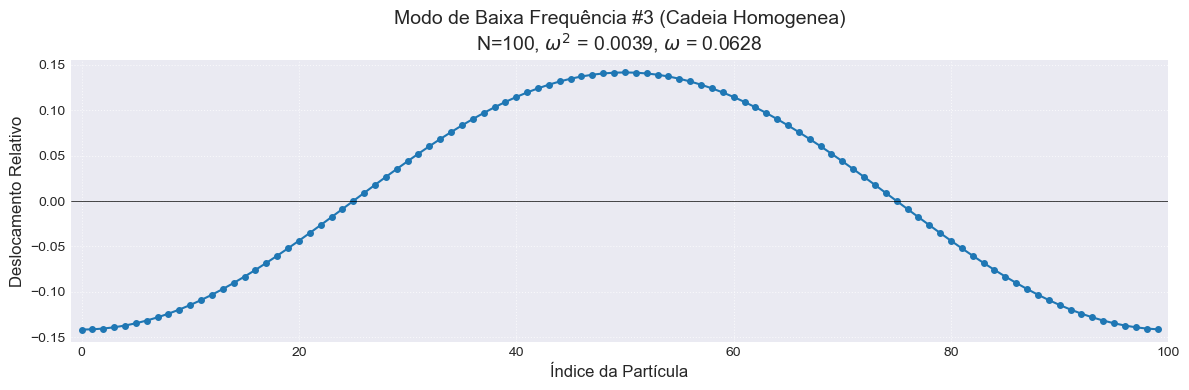

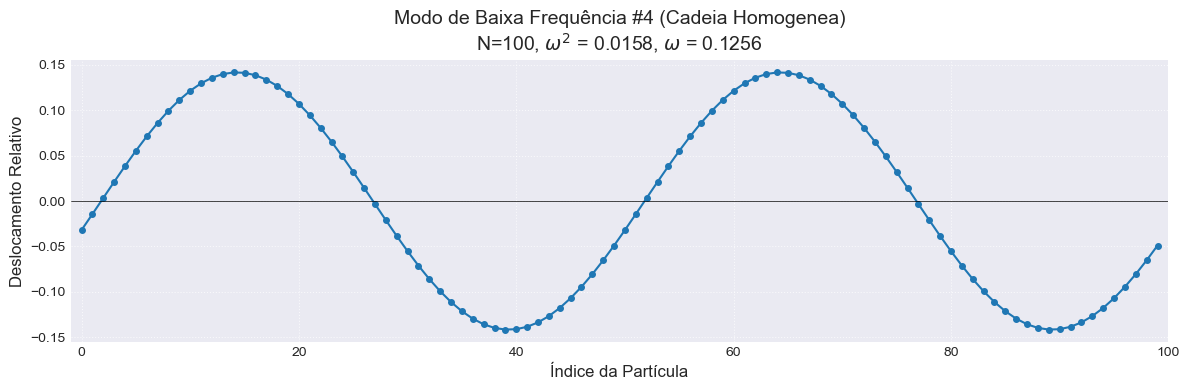

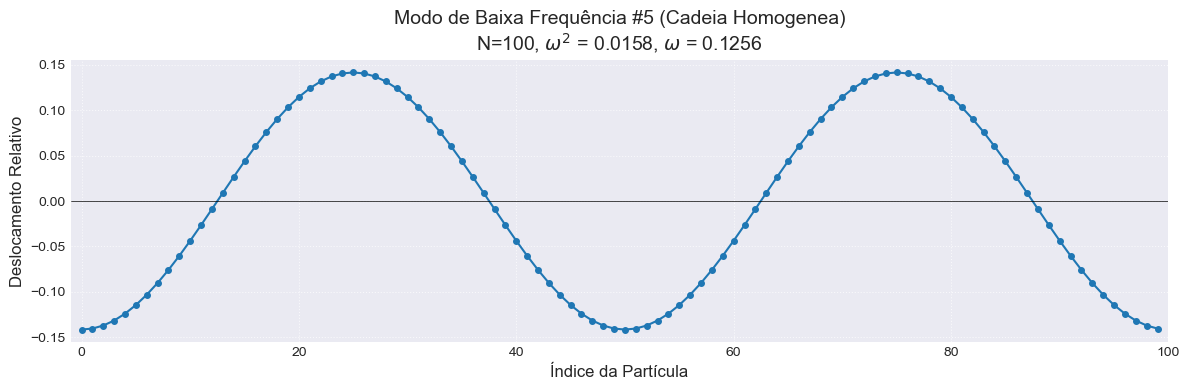


--- Plotando os 5 modos de maior frequência (alta energia) ---


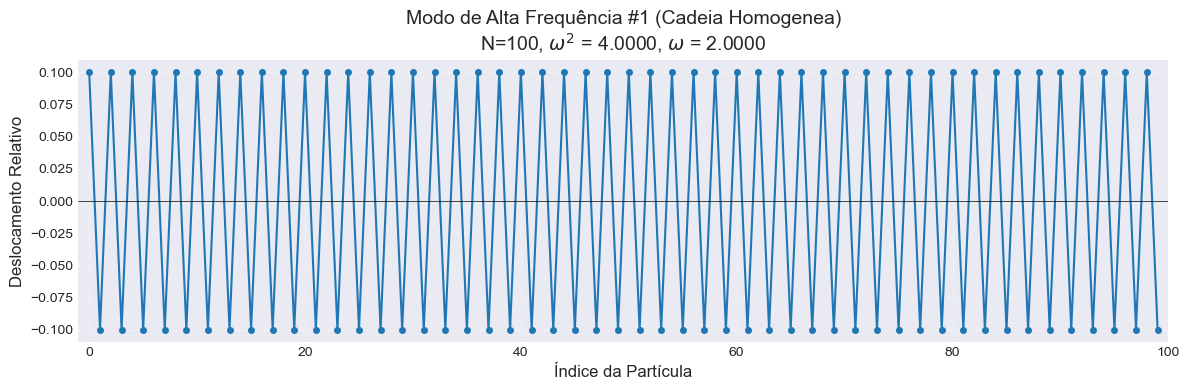

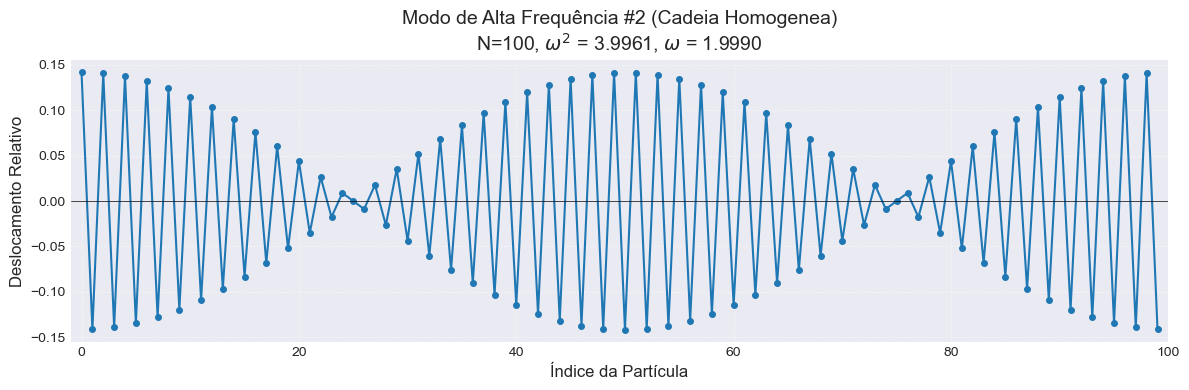

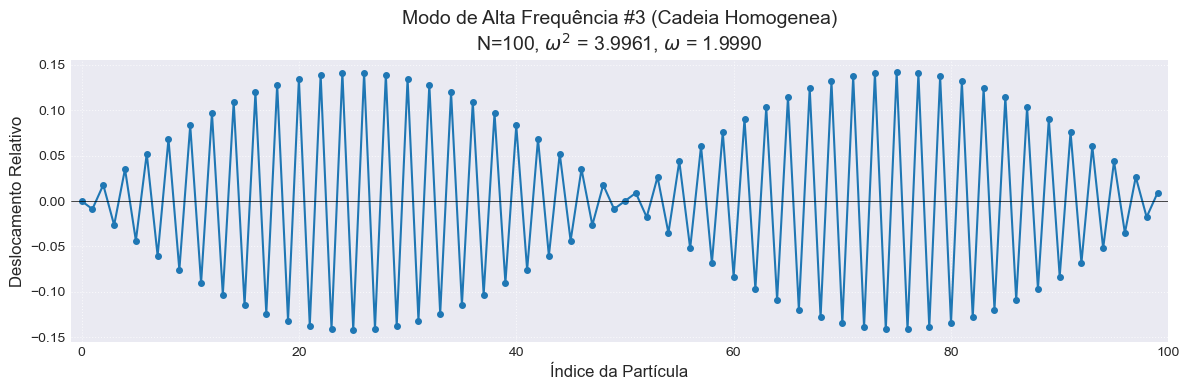

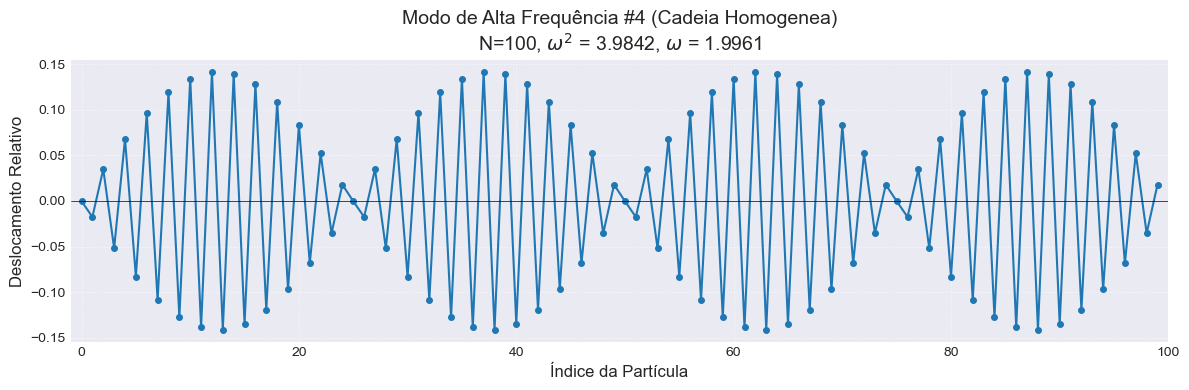

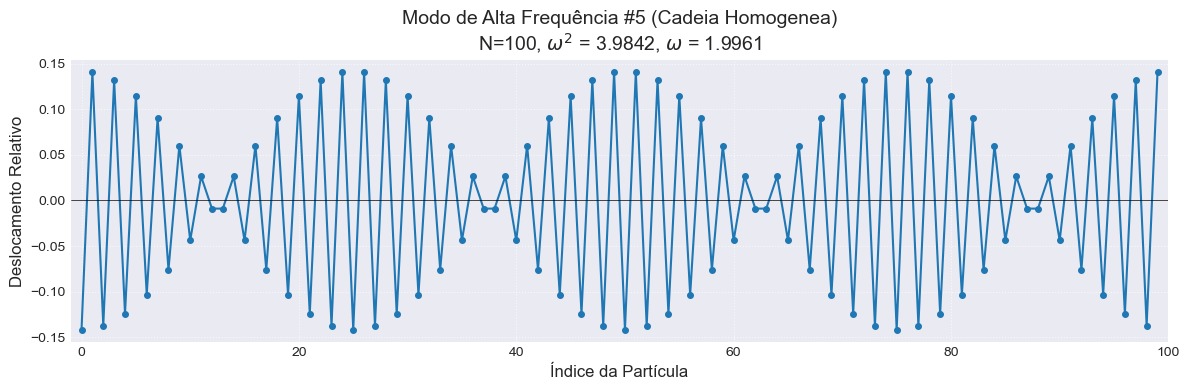

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                            Pode ser um único float (homogênea)
                                            ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- NOVA FUNÇÃO: Para plotar os deslocamentos ---
def plot_normal_mode(mode_vector, omega_squared, mode_rank, N, chain_type, mode_type):
    """
    Plota o deslocamento relativo dos átomos para um modo normal específico.

    Args:
        mode_vector (np.array): O autovetor (modo normal) a ser plotado.
        omega_squared (float): O autovalor (frequência ao quadrado) correspondente.
        mode_rank (int): A ordem do modo (1º, 2º, etc.) para o título.
        N (int): O número de partículas.
        chain_type (str): O tipo de cadeia (ex: 'Aleatória').
        mode_type (str): O tipo de modo (ex: 'Baixa Frequência', 'Alta Frequência').
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(12, 4))
    
    # Plota os deslocamentos usando marcadores e uma linha para conectar
    plt.plot(range(N), mode_vector, '-o', markersize=4, label='Deslocamento')
    
    # Adiciona uma linha horizontal em y=0 como referência
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    omega = np.sqrt(omega_squared) if omega_squared > 1e-9 else 0
    title = (f'Modo de {mode_type} #{mode_rank} (Cadeia {chain_type})\n'
             f'N={N}, $\omega^2$ = {omega_squared:.4f}, $\omega$ = {omega:.4f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel('Índice da Partícula', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xlim(-1, N) # Adiciona um pequeno espaço nas bordas do eixo x
    plt.tight_layout()
    plt.show()


# --- Parâmetros Definidos pelo Usuário ---
# N foi reduzido para uma visualização clara dos modos de deslocamento.
# Com 10.000 partículas, os padrões de onda seriam muito densos para serem vistos.
N_particles = 100 
k_spring = 1

# --- Escolha o tipo de cadeia para analisar ---
chain_type = "Homogenea"
m_base = 1
mass_value_for_chain = np.full(N_particles, m_base)

print(f"Analisando deslocamentos para uma cadeia '{chain_type}' com N={N_particles} partículas.")
print(f"Massas (primeiras 20): {mass_value_for_chain[:20]}...\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# --- MODIFICAÇÃO: Obter autovalores E autovetores ---
# A função `eig` retorna os autovalores e os autovetores correspondentes.
# Os autovetores são as colunas da matriz `autovetores`.
autovalores, autovetores = eig(B_matrix)

frequencias_quadrado = autovalores
modos_normais = autovetores

# --- NOVO: Ordenar frequências e modos ---
# `np.argsort` retorna os índices que ordenariam o array de frequências.
sorted_indices = np.argsort(frequencias_quadrado)

# Usa os índices ordenados para reorganizar tanto as frequências quanto os modos normais.
# Isso garante que cada frequência ainda corresponda ao seu modo correto.
sorted_frequencias_quadrado = frequencias_quadrado[sorted_indices]
# As colunas dos autovetores são reordenadas para corresponder às frequências ordenadas.
sorted_modos_normais = modos_normais[:, sorted_indices]

# --- Apresentação dos Gráficos de Deslocamento ---

# 1. Plota os 5 modos de MENOR frequência
print("--- Plotando os 5 modos de menor frequência (baixa energia) ---")
for i in range(5):
    # O modo i-ésimo menor corresponde à i-ésima coluna dos vetores ordenados
    mode_vector = sorted_modos_normais[:, i]
    omega_sq = sorted_frequencias_quadrado[i]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Baixa Frequência")

# 2. Plota os 5 modos de MAIOR frequência
print("\n--- Plotando os 5 modos de maior frequência (alta energia) ---")
for i in range(5):
    # O i-ésimo modo maior está no final do array ordenado.
    # Usamos indexação negativa: -1 para o último, -2 para o penúltimo, etc.
    mode_index_from_end = - (i + 1)
    mode_vector = sorted_modos_normais[:, mode_index_from_end]
    omega_sq = sorted_frequencias_quadrado[mode_index_from_end]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Alta Frequência")

<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:66: SyntaxWarning: invalid escape sequence '\o'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\1086380252.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.5f}, $\omega$ = {omega:.4f}')
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8512\1086380252.py:66: SyntaxWarning: invalid escape sequence '\o'
  f'N={N}, $\omega^2$ = {omega_squared:.5f}, $\omega$ = {omega:.4f}')


Analisando deslocamentos para uma cadeia 'Homogenea' com N=1000 partículas.
Massas (primeiras 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

--- Plotando os 5 modos de menor frequência (baixa energia) ---


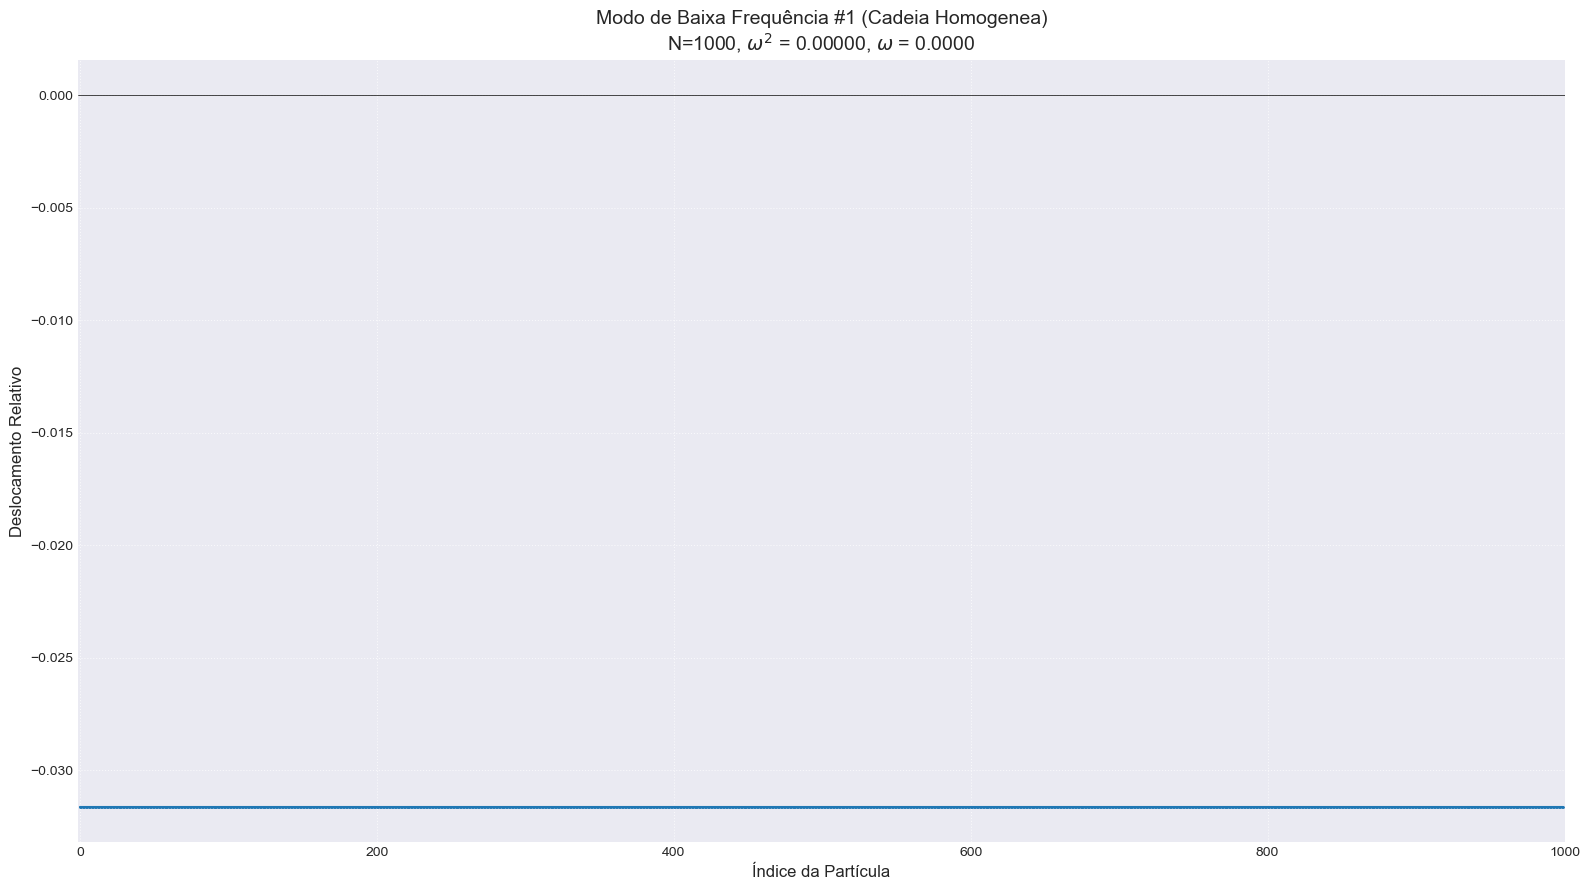

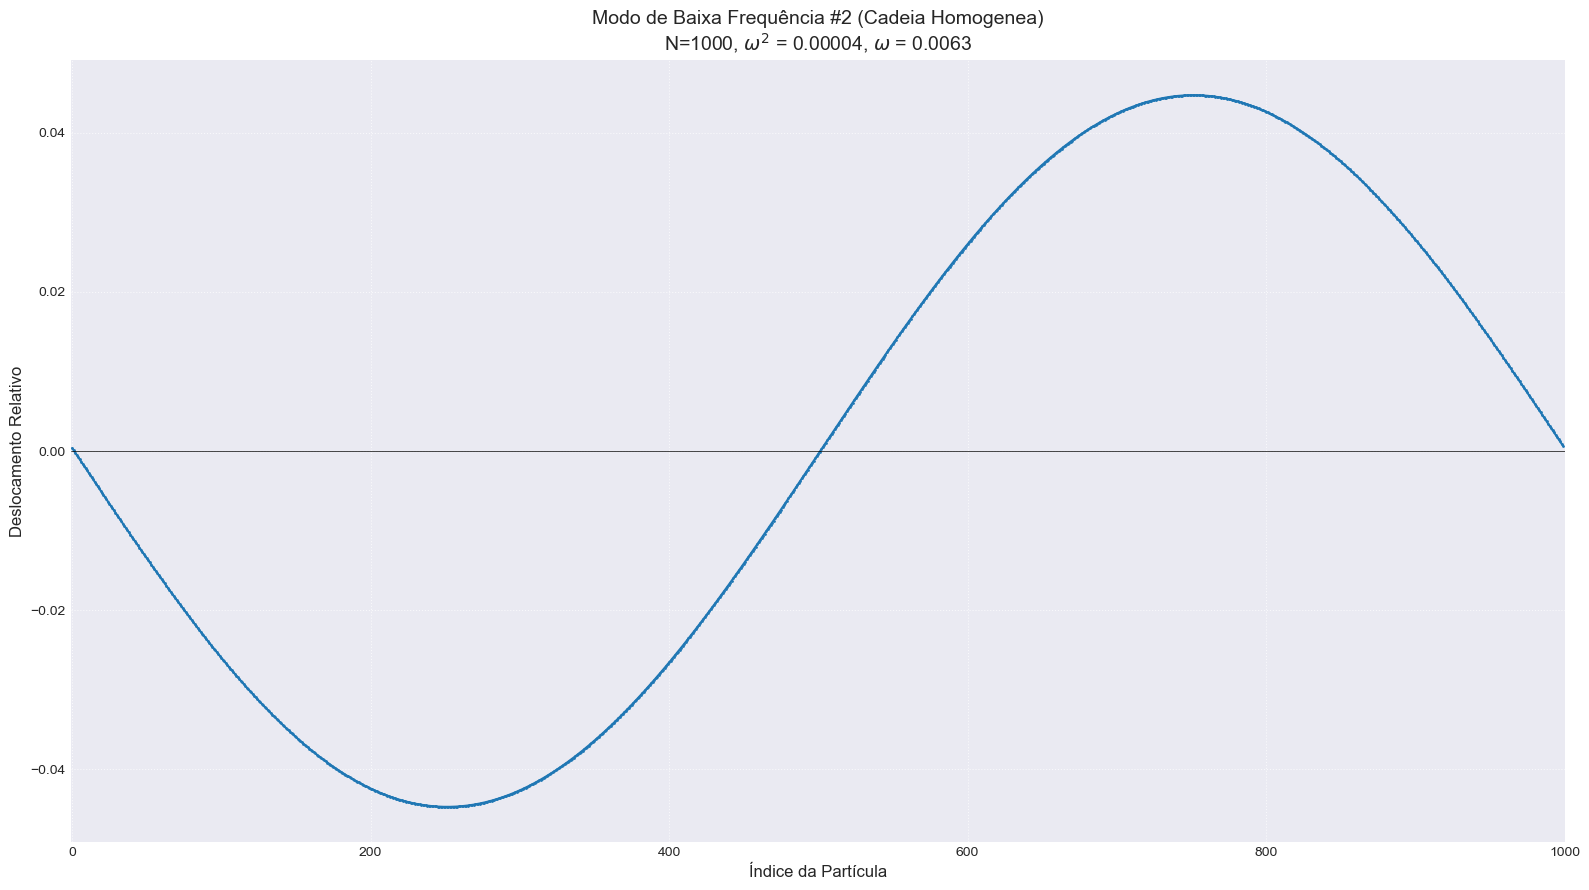

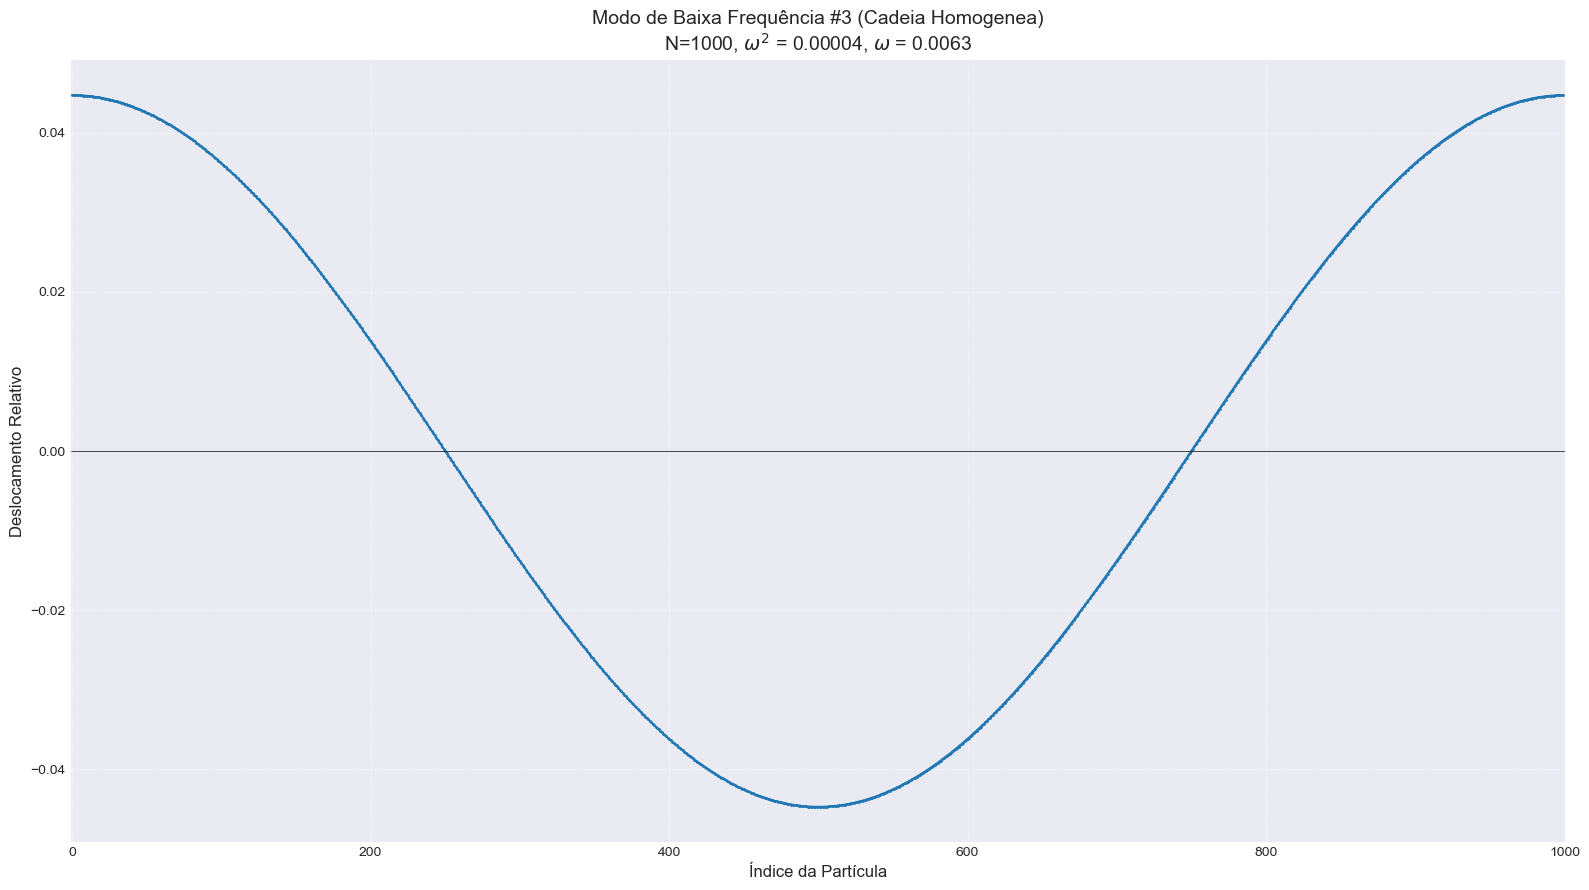

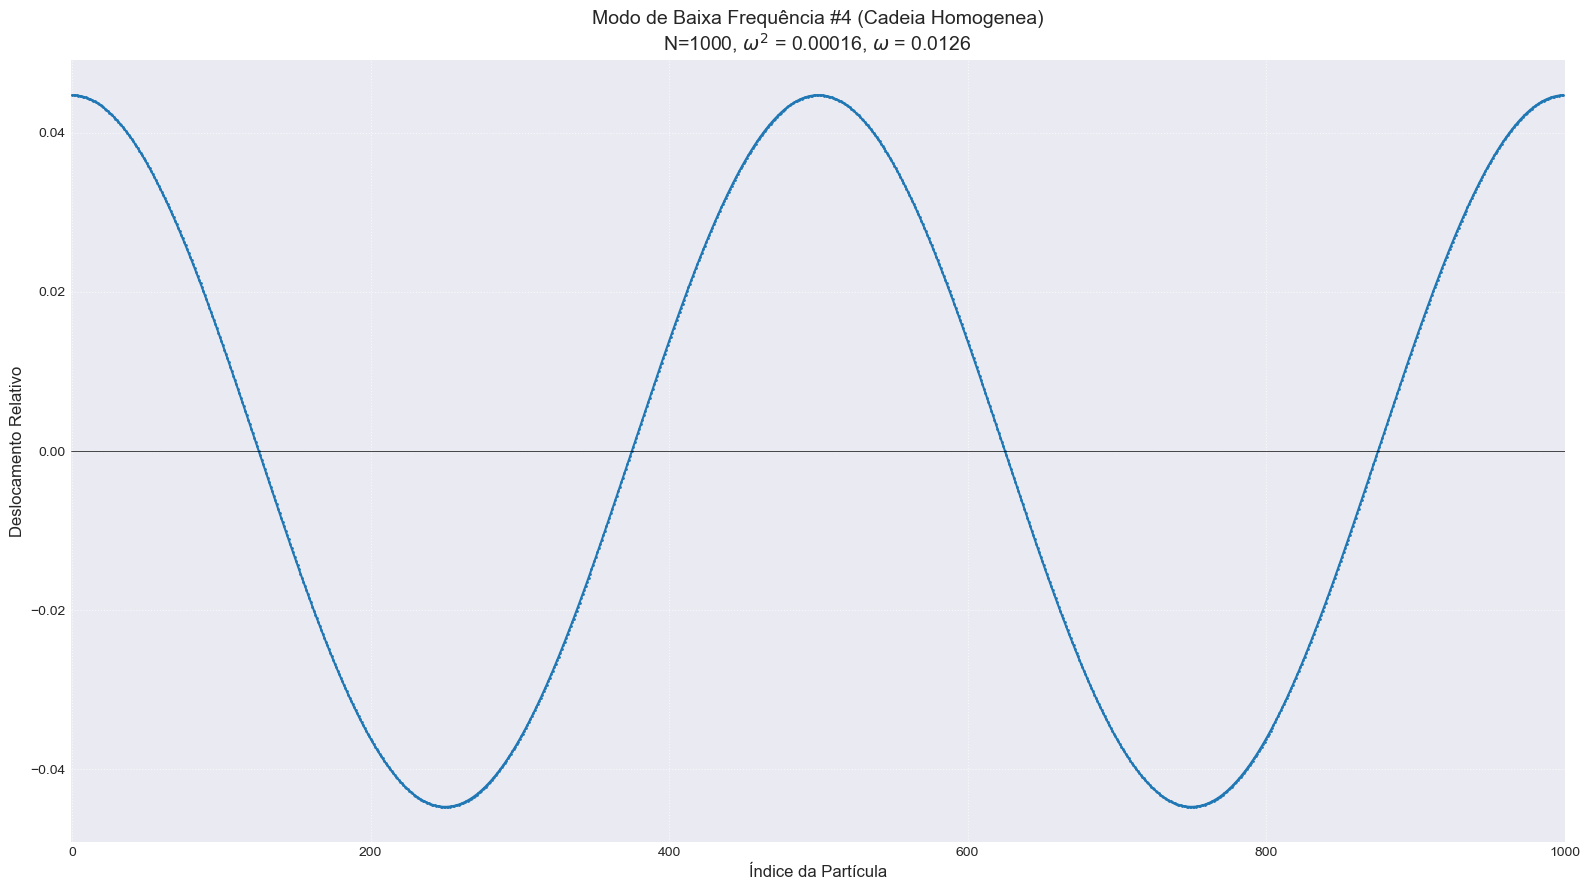

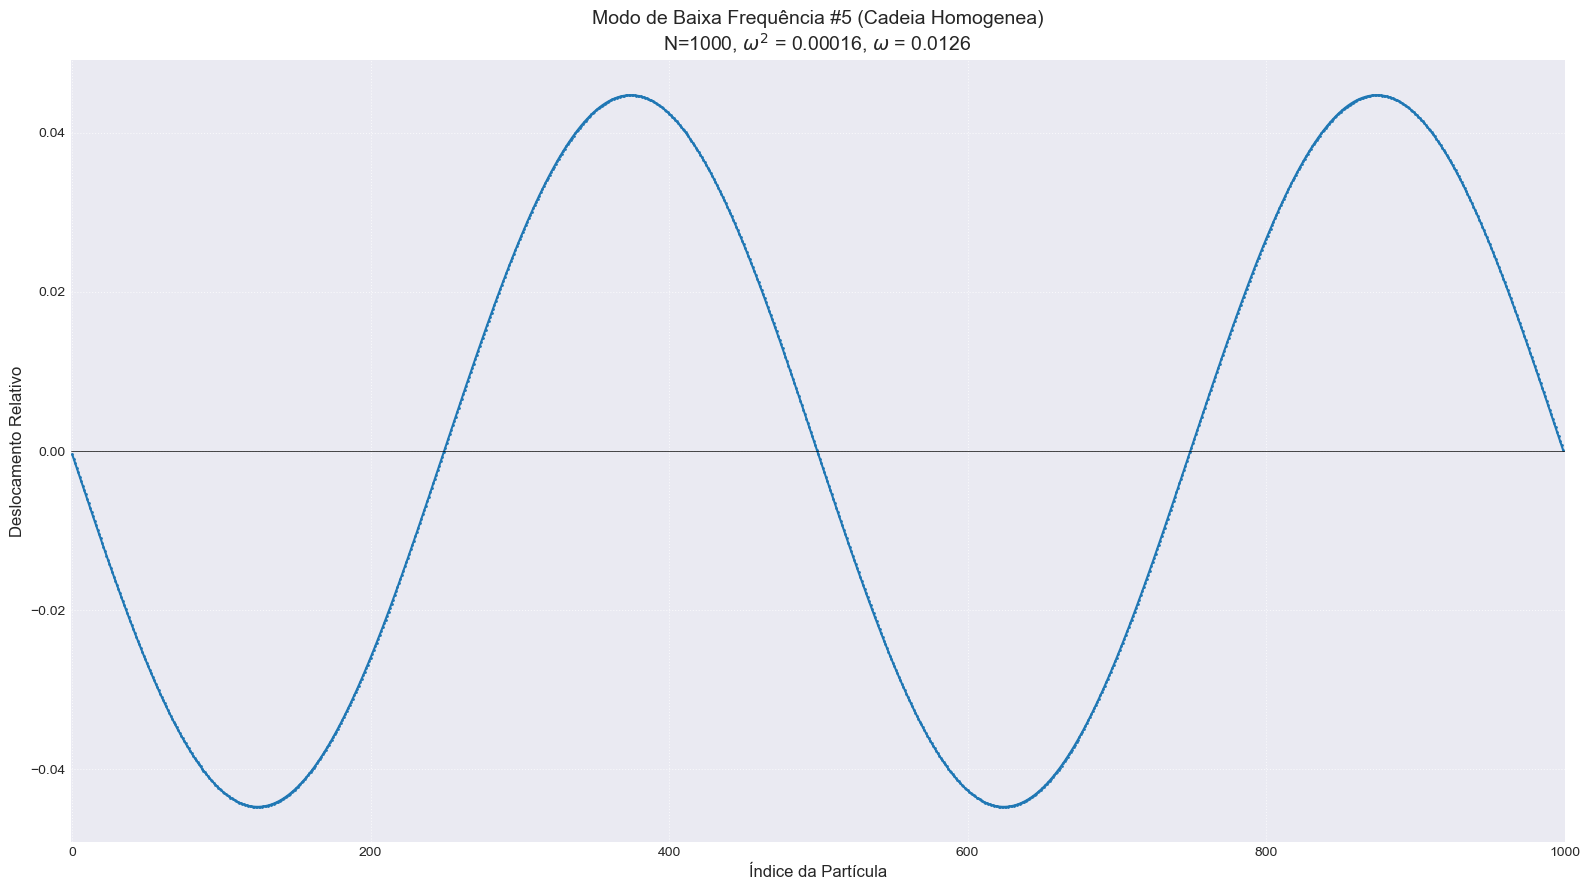


--- Plotando os 5 modos de maior frequência (alta energia) ---


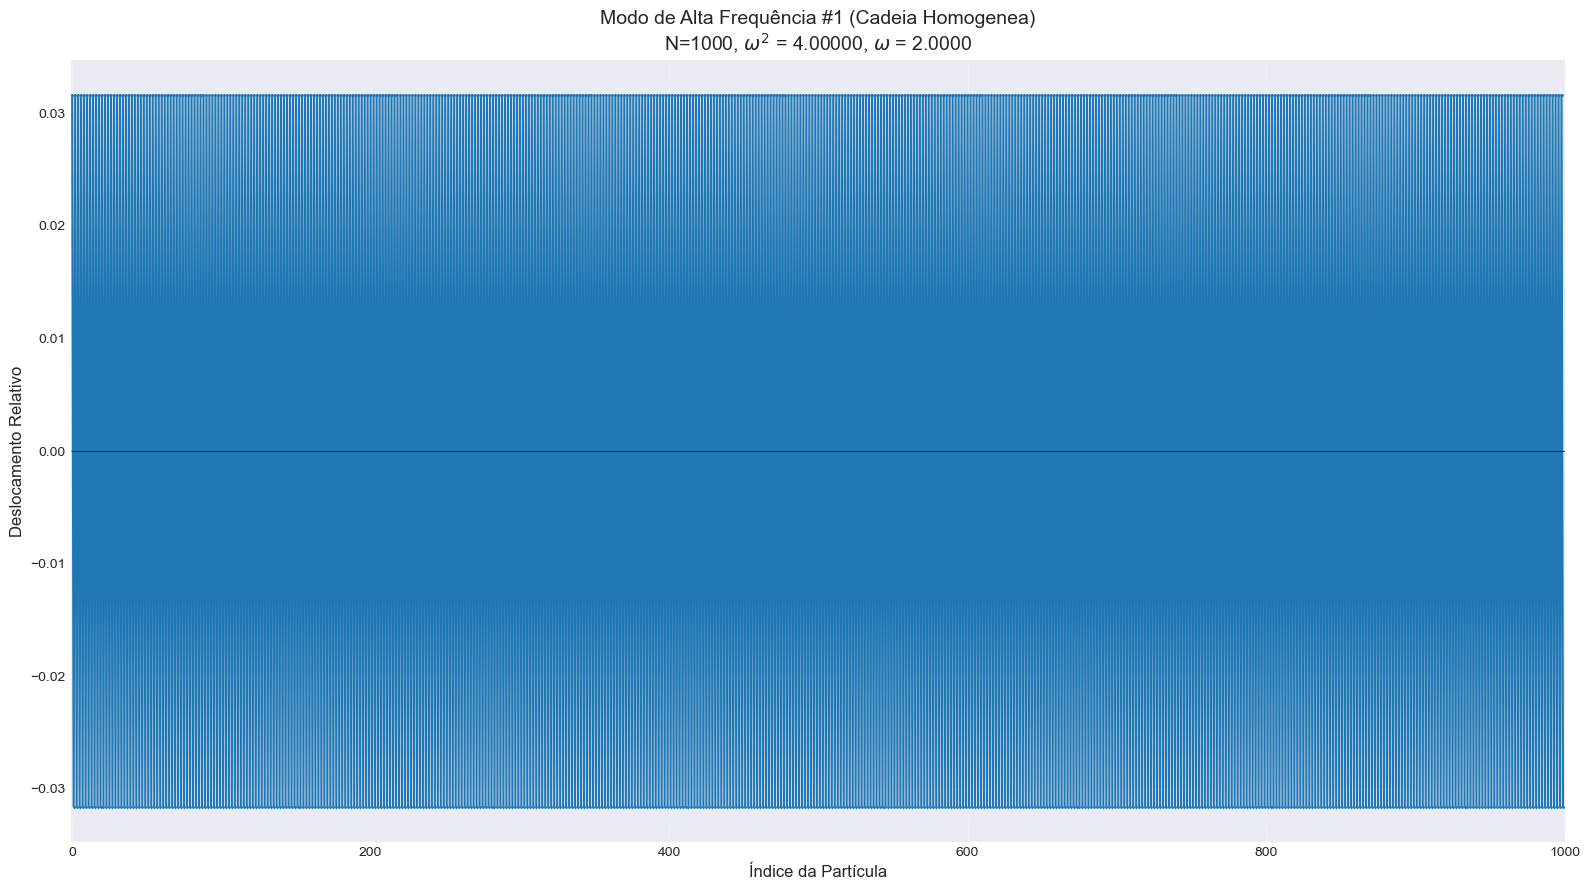

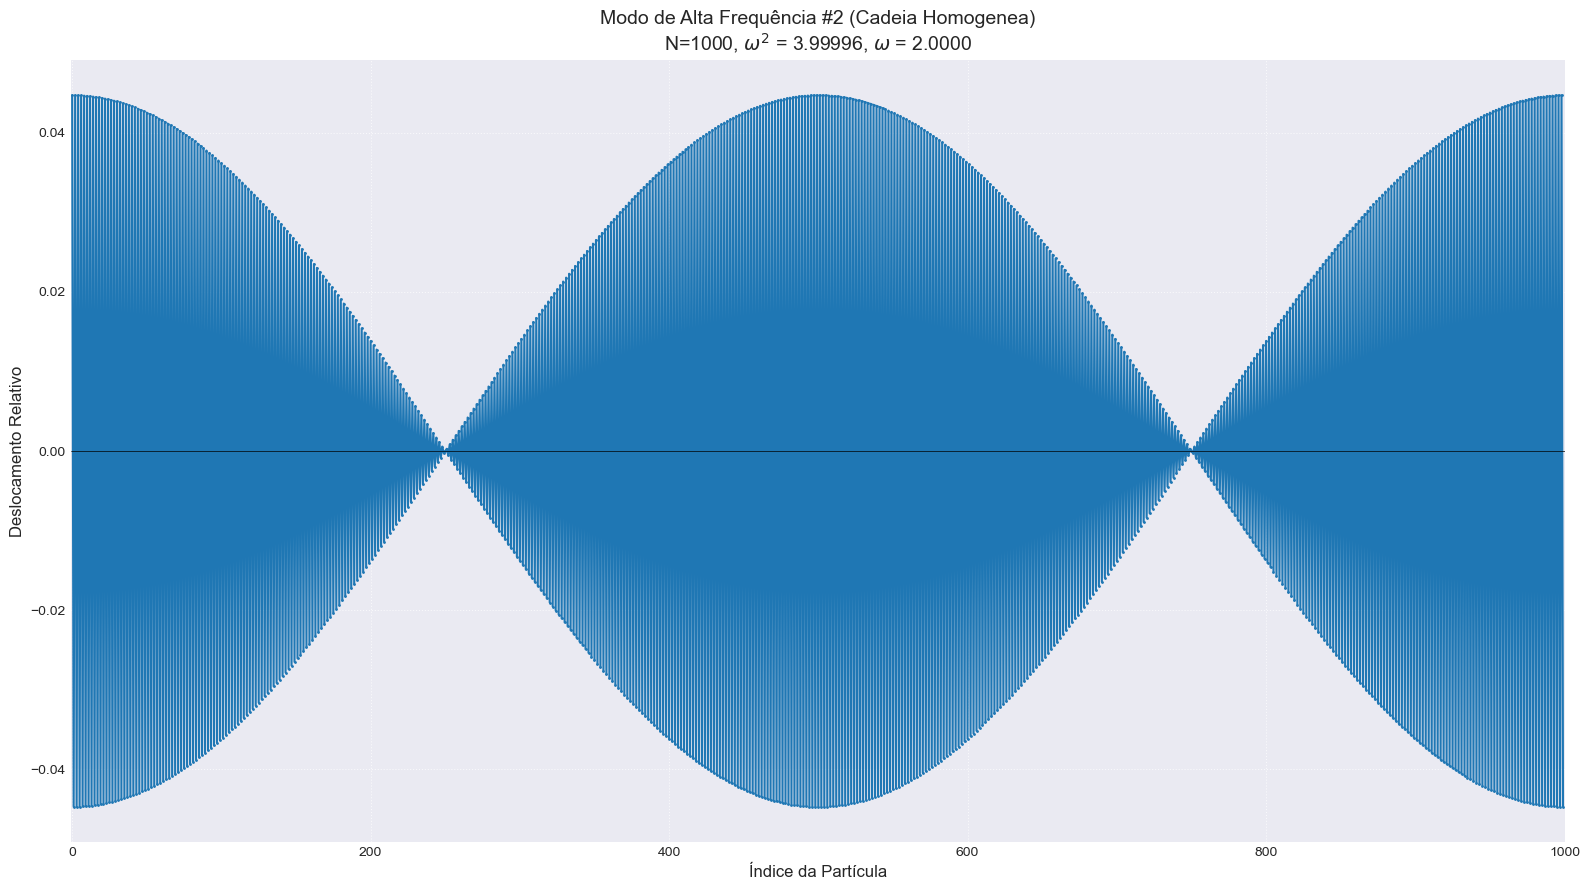

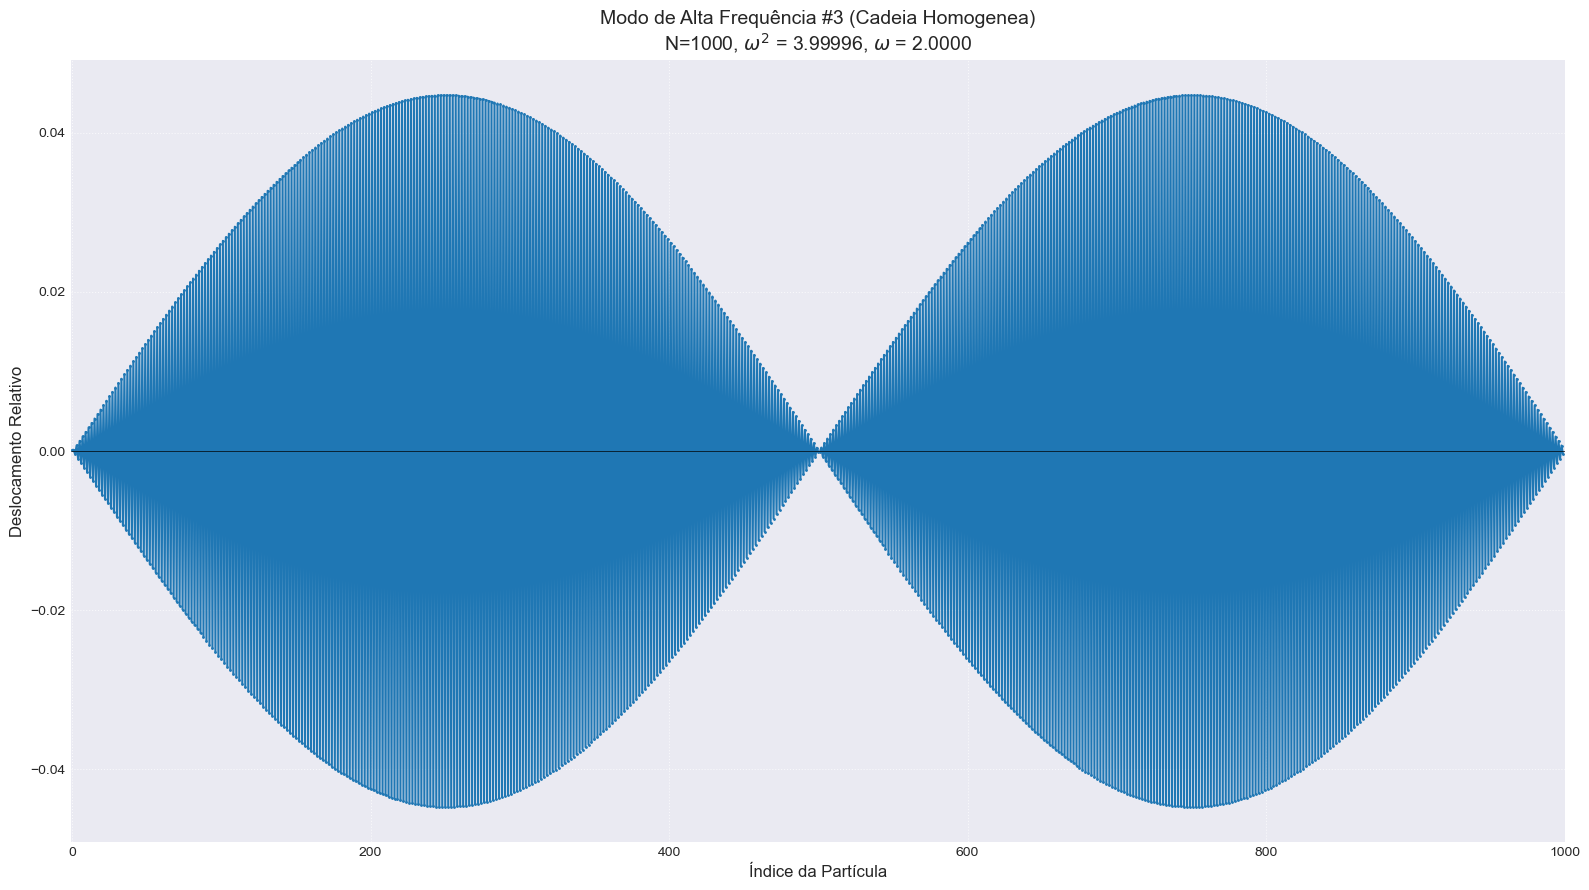

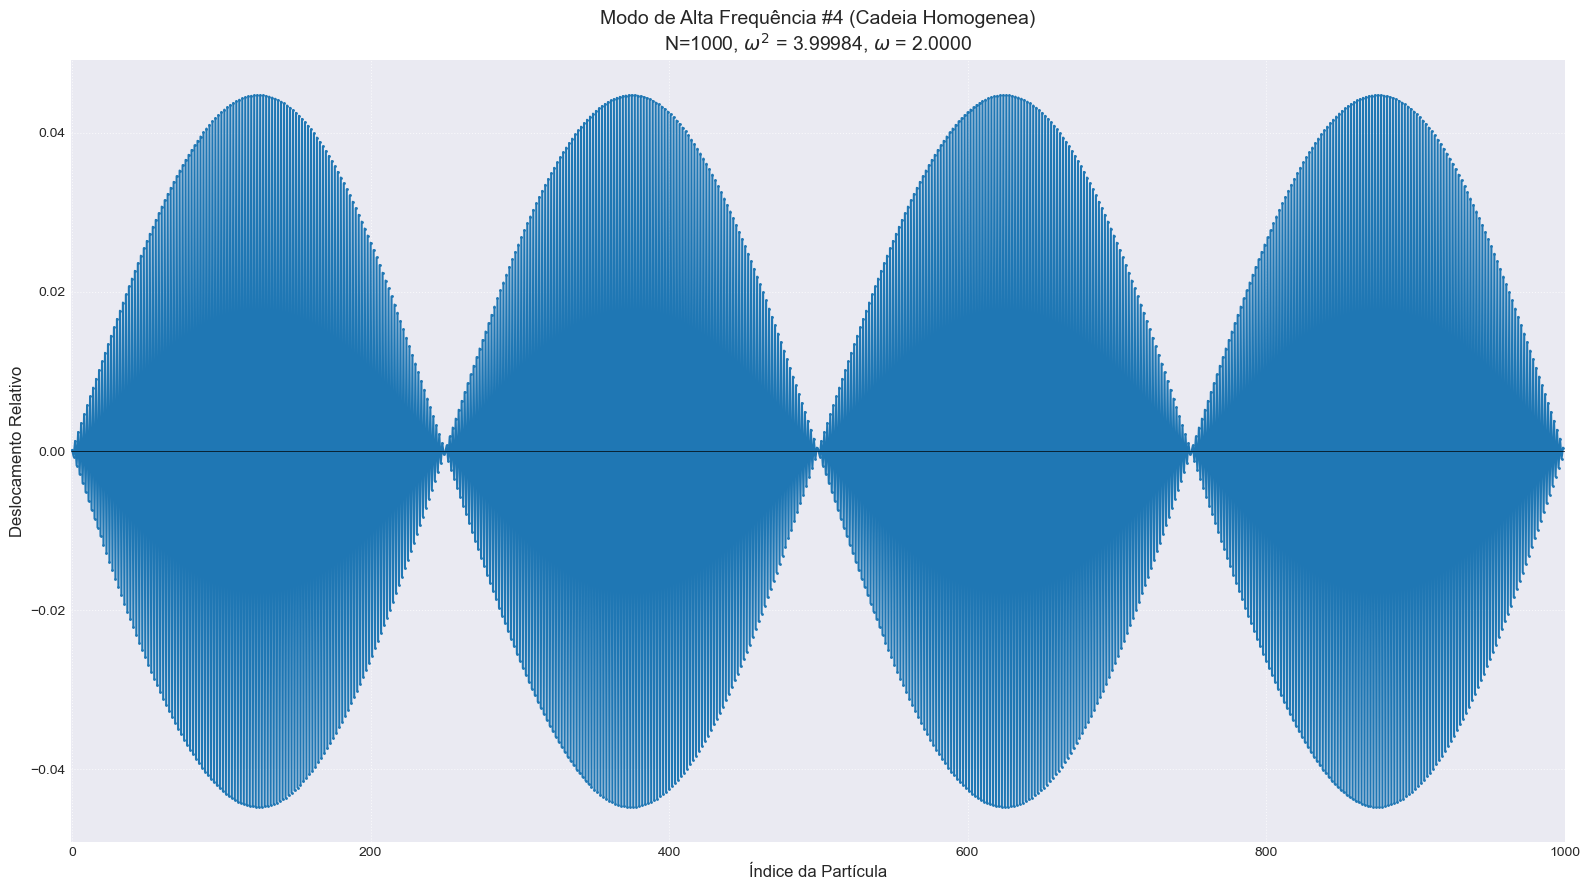

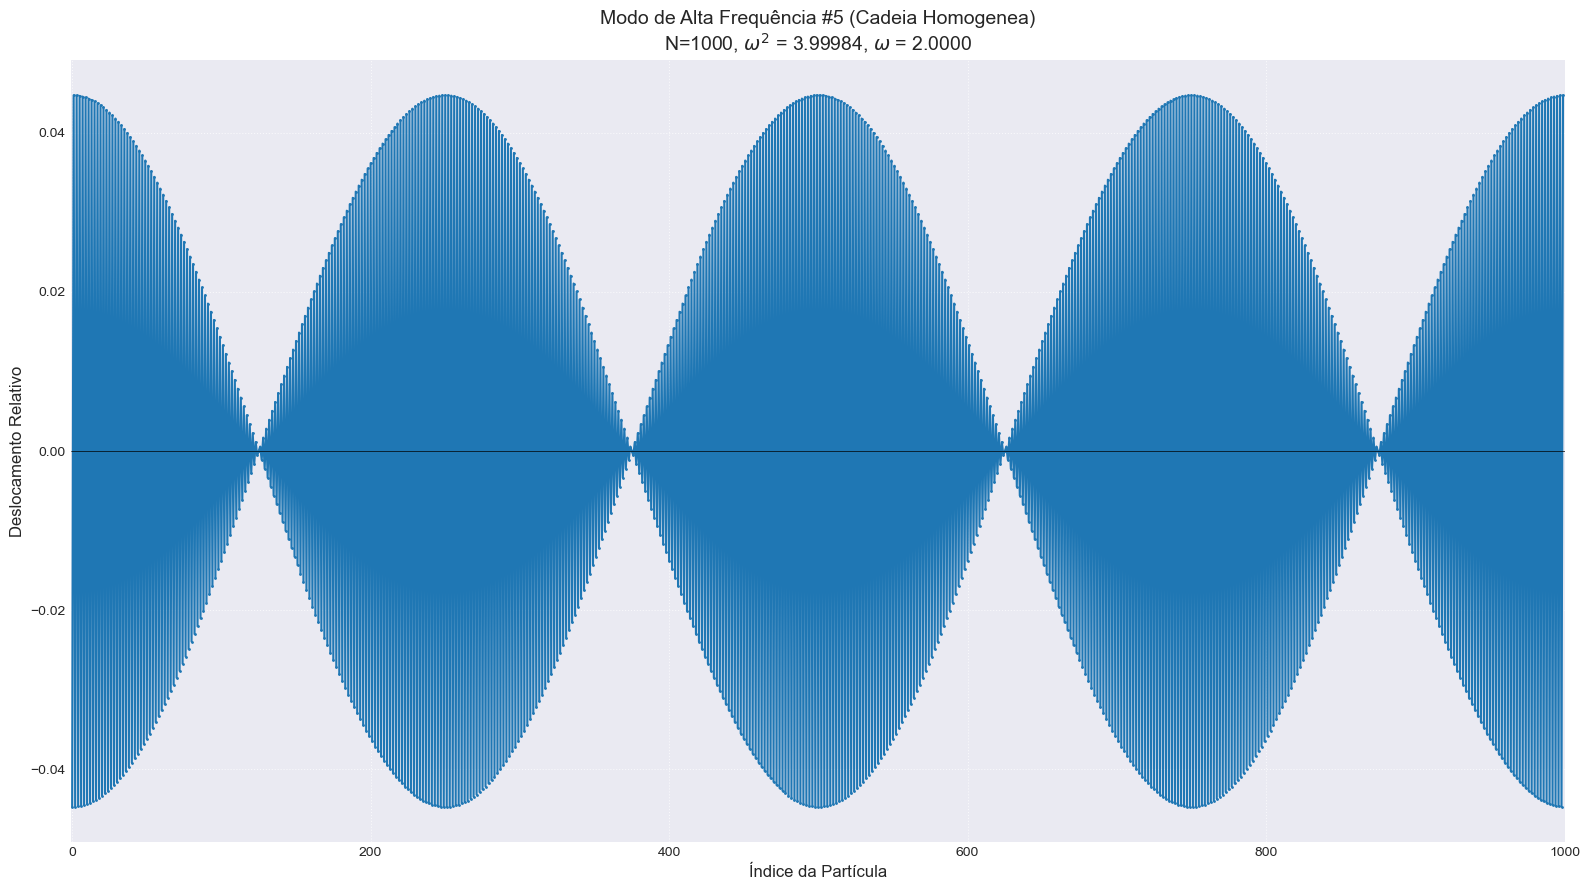

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                            Pode ser um único float (homogênea)
                                            ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- NOVA FUNÇÃO: Para plotar os deslocamentos ---
def plot_normal_mode(mode_vector, omega_squared, mode_rank, N, chain_type, mode_type):
    """
    Plota o deslocamento relativo dos átomos para um modo normal específico.

    Args:
        mode_vector (np.array): O autovetor (modo normal) a ser plotado.
        omega_squared (float): O autovalor (frequência ao quadrado) correspondente.
        mode_rank (int): A ordem do modo (1º, 2º, etc.) para o título.
        N (int): O número de partículas.
        chain_type (str): O tipo de cadeia (ex: 'Aleatória').
        mode_type (str): O tipo de modo (ex: 'Baixa Frequência', 'Alta Frequência').
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(16, 9))
    
    # Plota os deslocamentos usando marcadores e uma linha para conectar
    plt.plot(range(N), mode_vector, '-o', markersize=1, label='Deslocamento')
    
    # Adiciona uma linha horizontal em y=0 como referência
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    omega = np.sqrt(omega_squared) if omega_squared > 1e-9 else 0
    title = (f'Modo de {mode_type} #{mode_rank} (Cadeia {chain_type})\n'
             f'N={N}, $\omega^2$ = {omega_squared:.5f}, $\omega$ = {omega:.4f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel('Índice da Partícula', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xlim(-1, N) # Adiciona um pequeno espaço nas bordas do eixo x
    plt.tight_layout()
    plt.show()


# --- Parâmetros Definidos pelo Usuário ---
# N foi reduzido para uma visualização clara dos modos de deslocamento.
# Com 10.000 partículas, os padrões de onda seriam muito densos para serem vistos.
N_particles = 1000 
k_spring = 1

# --- Escolha o tipo de cadeia para analisar ---
chain_type = "Homogenea"
m_base = 1
mass_value_for_chain = np.full(N_particles, m_base)

print(f"Analisando deslocamentos para uma cadeia '{chain_type}' com N={N_particles} partículas.")
print(f"Massas (primeiras 20): {mass_value_for_chain[:20]}...\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# --- MODIFICAÇÃO: Obter autovalores E autovetores ---
# A função `eig` retorna os autovalores e os autovetores correspondentes.
# Os autovetores são as colunas da matriz `autovetores`.
autovalores, autovetores = eig(B_matrix)

frequencias_quadrado = autovalores
modos_normais = autovetores

# --- NOVO: Ordenar frequências e modos ---
# `np.argsort` retorna os índices que ordenariam o array de frequências.
sorted_indices = np.argsort(frequencias_quadrado)

# Usa os índices ordenados para reorganizar tanto as frequências quanto os modos normais.
# Isso garante que cada frequência ainda corresponda ao seu modo correto.
sorted_frequencias_quadrado = frequencias_quadrado[sorted_indices]
# As colunas dos autovetores são reordenadas para corresponder às frequências ordenadas.
sorted_modos_normais = modos_normais[:, sorted_indices]

# --- Apresentação dos Gráficos de Deslocamento ---

# 1. Plota os 5 modos de MENOR frequência
print("--- Plotando os 5 modos de menor frequência (baixa energia) ---")
for i in range(5):
    # O modo i-ésimo menor corresponde à i-ésima coluna dos vetores ordenados
    mode_vector = sorted_modos_normais[:, i]
    omega_sq = sorted_frequencias_quadrado[i]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Baixa Frequência")

# 2. Plota os 5 modos de MAIOR frequência
print("\n--- Plotando os 5 modos de maior frequência (alta energia) ---")
for i in range(5):
    # O i-ésimo modo maior está no final do array ordenado.
    # Usamos indexação negativa: -1 para o último, -2 para o penúltimo, etc.
    mode_index_from_end = - (i + 1)
    mode_vector = sorted_modos_normais[:, mode_index_from_end]
    omega_sq = sorted_frequencias_quadrado[mode_index_from_end]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Alta Frequência")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

def create_dynamic_matrix_circular(N, m_values, k_val):
    """
    Cria a matriz dinâmica para N partículas em uma CADEIA CIRCULAR.

    Args:
        N (int): O número de partículas.
        m_values (float ou list/np.array): A massa de cada partícula.
                                            Pode ser um único float (homogênea)
                                            ou um array/lista de N floats (aleatória).
        k_val (float): A constante elástica da mola (assumida como uniforme para todas as molas).

    Returns:
        np.array: A matriz dinâmica N x N.
    """
    if N <= 0:
        raise ValueError("O número de partículas (N) deve ser um inteiro positivo.")

    if isinstance(m_values, (int, float)):
        masses = np.full(N, m_values)
    else:
        masses = np.array(m_values)
        if len(masses) != N:
            raise ValueError(f"O comprimento de m_values ({len(masses)}) deve ser igual a N_particles ({N}).")

    matrix = np.zeros((N, N))

    for i in range(N):
        current_mass = masses[i]
        matrix[i, i] = (2 * k_val) / current_mass

        next_particle_index = (i + 1) % N
        matrix[i, next_particle_index] = -k_val / current_mass

        prev_particle_index = (i - 1 + N) % N
        matrix[i, prev_particle_index] = -k_val / current_mass
    return matrix

# --- NOVA FUNÇÃO: Para plotar os deslocamentos ---
def plot_normal_mode(mode_vector, omega_squared, mode_rank, N, chain_type, mode_type):
    """
    Plota o deslocamento relativo dos átomos para um modo normal específico.

    Args:
        mode_vector (np.array): O autovetor (modo normal) a ser plotado.
        omega_squared (float): O autovalor (frequência ao quadrado) correspondente.
        mode_rank (int): A ordem do modo (1º, 2º, etc.) para o título.
        N (int): O número de partículas.
        chain_type (str): O tipo de cadeia (ex: 'Aleatória').
        mode_type (str): O tipo de modo (ex: 'Baixa Frequência', 'Alta Frequência').
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(16, 9))
    
    # Plota os deslocamentos usando marcadores e uma linha para conectar
    plt.plot(range(N), mode_vector, '-o', markersize=1, label='Deslocamento')
    
    # Adiciona uma linha horizontal em y=0 como referência
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)

    omega = np.sqrt(omega_squared) if omega_squared > 1e-9 else 0
    title = (f'Modo de {mode_type} #{mode_rank} (Cadeia {chain_type})\n'
             f'N={N}, $\omega^2$ = {omega_squared:.5f}, $\omega$ = {omega:.4f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel('Índice da Partícula', fontsize=12)
    plt.ylabel('Deslocamento Relativo', fontsize=12)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xlim(-1, N) # Adiciona um pequeno espaço nas bordas do eixo x
    plt.tight_layout()
    plt.show()


# --- Parâmetros Definidos pelo Usuário ---
# N foi reduzido para uma visualização clara dos modos de deslocamento.
# Com 10.000 partículas, os padrões de onda seriam muito densos para serem vistos.
N_particles = 10000 
k_spring = 1

# --- Escolha o tipo de cadeia para analisar ---
chain_type = "Homogenea"
m_base = 1
mass_value_for_chain = np.full(N_particles, m_base)

print(f"Analisando deslocamentos para uma cadeia '{chain_type}' com N={N_particles} partículas.")
print(f"Massas (primeiras 20): {mass_value_for_chain[:20]}...\n")
# -----------------------------------------------------------

# Cria a matriz dinâmica com base na escolha
B_matrix = create_dynamic_matrix_circular(N_particles, mass_value_for_chain, k_spring)

# --- MODIFICAÇÃO: Obter autovalores E autovetores ---
# A função `eig` retorna os autovalores e os autovetores correspondentes.
# Os autovetores são as colunas da matriz `autovetores`.
autovalores, autovetores = eig(B_matrix)

frequencias_quadrado = autovalores
modos_normais = autovetores

# --- NOVO: Ordenar frequências e modos ---
# `np.argsort` retorna os índices que ordenariam o array de frequências.
sorted_indices = np.argsort(frequencias_quadrado)

# Usa os índices ordenados para reorganizar tanto as frequências quanto os modos normais.
# Isso garante que cada frequência ainda corresponda ao seu modo correto.
sorted_frequencias_quadrado = frequencias_quadrado[sorted_indices]
# As colunas dos autovetores são reordenadas para corresponder às frequências ordenadas.
sorted_modos_normais = modos_normais[:, sorted_indices]

# --- Apresentação dos Gráficos de Deslocamento ---

# 1. Plota os 5 modos de MENOR frequência
print("--- Plotando os 5 modos de menor frequência (baixa energia) ---")
for i in range(5):
    # O modo i-ésimo menor corresponde à i-ésima coluna dos vetores ordenados
    mode_vector = sorted_modos_normais[:, i]
    omega_sq = sorted_frequencias_quadrado[i]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Baixa Frequência")

# 2. Plota os 5 modos de MAIOR frequência
print("\n--- Plotando os 5 modos de maior frequência (alta energia) ---")
for i in range(5):
    # O i-ésimo modo maior está no final do array ordenado.
    # Usamos indexação negativa: -1 para o último, -2 para o penúltimo, etc.
    mode_index_from_end = - (i + 1)
    mode_vector = sorted_modos_normais[:, mode_index_from_end]
    omega_sq = sorted_frequencias_quadrado[mode_index_from_end]
    plot_normal_mode(mode_vector, omega_sq, i + 1, N_particles, chain_type, "Alta Frequência")